In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as ss
import powerlaw

In [2]:
%matplotlib notebook
sns.set_style('darkgrid')

In [55]:
f1 = '/home/acer/Degrees/deg_15_300.csv'
df1 = pd.read_csv(f1)

In [56]:
len(df1.alist.unique())

173

In [57]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [58]:
df1.head(5)

alist  Deg_list
0      1    0.0000
1      2    0.0975
2      3    0.2100
3      4    0.2225
4      5    0.1500

In [59]:
'''
Create a dictionary for the keys with their associated values  

'''
keys = df1.alist.unique()
monotonic_index = pd.Index(df1['alist'])
degree_dist = {}

for key in keys:
    inds = monotonic_index.get_loc(key)
    x = df1['Deg_list'][inds]
    degree_dist[key] = (np.quantile(x, 0.025), x.mean(), np.quantile(x, 0.975))


In [60]:
Degree = list(degree_dist.keys())
Freq = np.asarray(list(degree_dist.values()))
Ci_lower = np.asarray([x[0] for x in Freq])
Means = np.asarray([x[1] for x in Freq])
Ci_upper = np.asarray([x[2] for x in Freq])

data = {'Degree': Degree, 'Ci_lower':Ci_lower, 'Means': Means,
       'Ci_upper': Ci_upper}

df2 = pd.DataFrame(data, columns=['Degree', 'Ci_lower', 'Means', 'Ci_upper'])

In [61]:
zero_index = df2.index[pd.Index(df2['Means']).get_loc(0) == True].tolist()

In [62]:
df3 = df2.drop(zero_index, axis=0)

In [63]:
df3.sample(5)

Degree  Ci_lower     Means  Ci_upper
25      26       0.0  0.000820  0.003625
42      43       0.0  0.000063  0.000000
69      70       0.0  0.000515  0.003451
70      71       0.0  0.000188  0.001943
92      93       0.0  0.000144  0.001407

In [64]:
fit = powerlaw.Fit(df3['Means'], discrete=True)

Calculating best minimal value for power law fit
/home/acer/.local/lib/python3.6/site-packages/powerlaw.py:1146: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/home/acer/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [65]:
xmin, alpha, sigma = fit.xmin, fit.alpha, fit.sigma
print(xmin, alpha, sigma)

0.08574560425292425 1.348111050724127 0.15567999462760504


/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


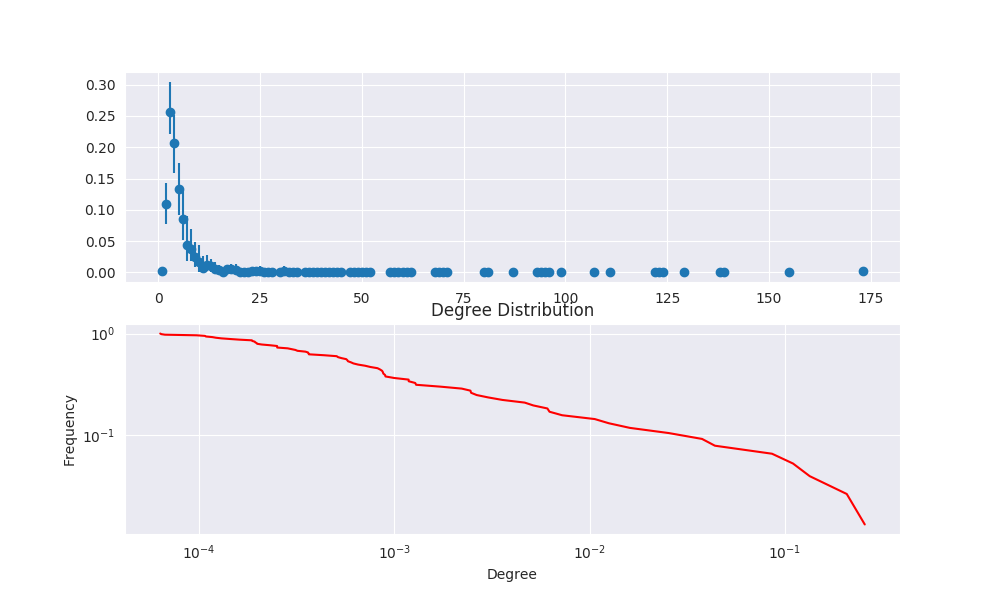

In [66]:
plt.figure(1, figsize=(10,6))
plt.subplot(211)
lines = plt.errorbar(df3['Degree'], df3['Means'], xerr=0.5,
                    yerr=[df3['Means'] - df3['Ci_lower'],
                    df3['Ci_upper'] - df3['Means']],
                    linestyle='',fmt='o')

plt.subplot(212)
powerlaw.plot_ccdf(df3['Means'], color='r' )
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [67]:
log_degree = np.log(Degree)
log_means = np.log(Means)
log_Ci_lower = np.log(Ci_lower)
np.log_Ci_upper = np.log(Ci_upper)

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


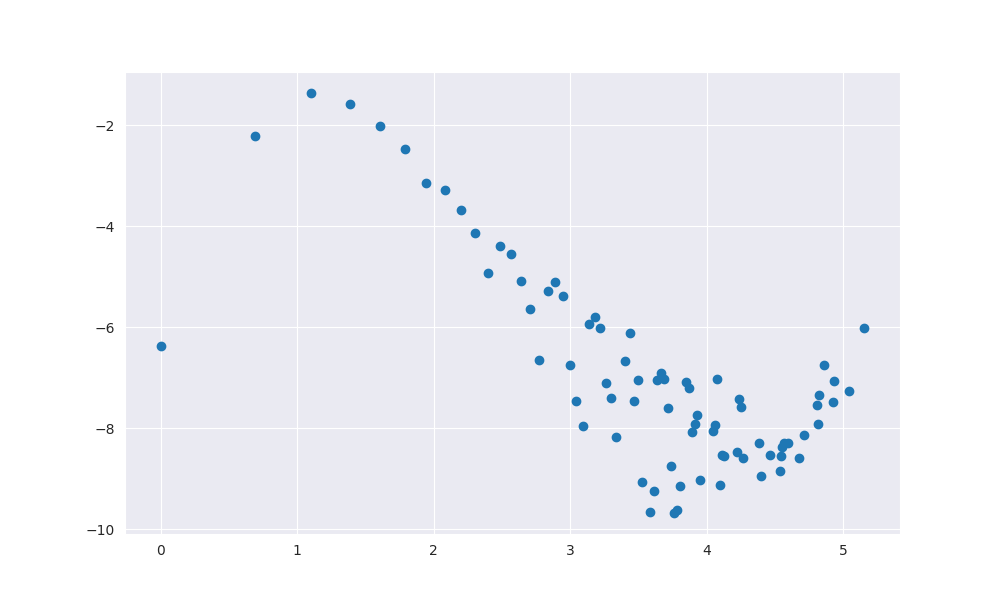

In [68]:
plt.figure(2, figsize=(10,6))
lines = plt.scatter(log_degree, log_means)
plt.show()

In [69]:
from statsmodels.formula.api import ols

In [70]:
dflog = np.log(df3[['Degree', 'Means']])
model = ols('Means ~ Degree', data = dflog).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Means   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     97.63
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           3.20e-15
Time:                        23:00:02   Log-Likelihood:                -129.92
No. Observations:                  77   AIC:                             263.8
Df Residuals:                      75   BIC:                             268.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8651      0.531     -3.512      0.001      -2.923      -0.807
Degree        -1.4250      0.144     -9.881      0.000      -1.712      -1.138
==============================================================================
Omnibus:                        5.517   Durbin-Watson:                   0.606
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.043
Skew:                          -0.442   Prob(JB):                       0.0803
Kurtosis:                       3.890   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
Means_hat = np.exp(xmin) * df3[['Degree']]**(-alpha)

In [72]:
df3.insert(loc=3, value = Means_hat, column='Means_hat')

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


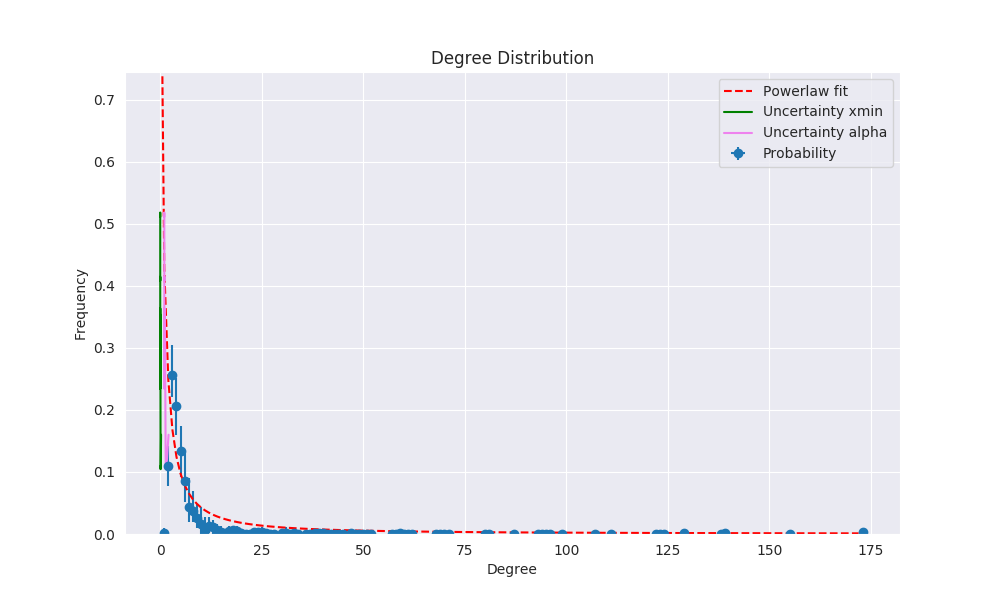

In [73]:
plt.figure(3, figsize=(10,6))
lines = plt.errorbar(df3['Degree'], df3['Means'], xerr=0.5,
                    yerr=[df3['Means'] - df3['Ci_lower'],
                    df3['Ci_upper'] - df3['Means']],
                    linestyle='',fmt='o', label='Probability')


plt.plot(df3['Means_hat'], color='r', linestyle='--', label='Powerlaw fit')
plt.plot(fit.xmins, fit.Ds, color='g', label='Uncertainty xmin')
plt.plot(fit.alphas, fit.Ds, color='violet' , label='Uncertainty alpha')
plt.ylim(0, max(fit.sigmas))
plt.legend()
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [74]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio = True)
print(R, p)

-3.3955525058718576 0.0006849023591887031


/home/acer/.local/lib/python3.6/site-packages/powerlaw.py:1146: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/home/acer/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [75]:
inds_1 = df1.index[pd.Index(df1['alist']).get_loc(1) == True].tolist()

In [76]:
# To add the last range of the runs
inds_1.append(df1.shape[0])

In [77]:
'''split the data based on the number of runs'''
l_mod = [0] + inds_1 + [max(inds_1)+1]

list_of_dfs = [df1.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]

In [78]:
'''removing first and last element of the list of data frames because they are empty'''
del(list_of_dfs[0], list_of_dfs[-1])

In [79]:
xmins, alphas, ktests = list(), list(), list()
for i in range(0, len(list_of_dfs)):
    x = list_of_dfs[i]['Deg_list']
    fit_ = powerlaw.Fit(x, discrete=True)
    xmin = fit_.xmin
    alpha = fit_.alpha
    xmins.append(xmin)
    alphas.append(alpha)
    ktests.append(ss.kstest(x, "powerlaw", args=(alpha, xmin), N=len(x)))
            

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acer/.local/lib/python3.6/site-packages/powerlaw.py:1146: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/home/acer/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Thro

In [80]:
ktests[:20]

[KstestResult(statistic=0.9767441860465116, pvalue=3.8335331745527345e-211),
 KstestResult(statistic=0.9857142857142858, pvalue=1.3936932436279473e-129),
 KstestResult(statistic=0.9827586206896551, pvalue=1.0524618661803575e-102),
 KstestResult(statistic=0.9878309800143952, pvalue=8.789288719776594e-60),
 KstestResult(statistic=0.9597760859911902, pvalue=3.0227560448097987e-56),
 KstestResult(statistic=0.9824561403508771, pvalue=1.6449898490291252e-100),
 KstestResult(statistic=0.9567484273902932, pvalue=6.747165032938807e-66),
 KstestResult(statistic=0.9916686400927203, pvalue=2.606807129076389e-102),
 KstestResult(statistic=0.9495539121376622, pvalue=1.4911009067162532e-79),
 KstestResult(statistic=0.9973687120741342, pvalue=7.901306561785084e-256),
 KstestResult(statistic=0.9088283934722522, pvalue=2.373244585891859e-50),
 KstestResult(statistic=0.9713940020346887, pvalue=1.3865644490879795e-165),
 KstestResult(statistic=0.9859154929577465, pvalue=7.272558721698453e-132),
 KstestRes

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


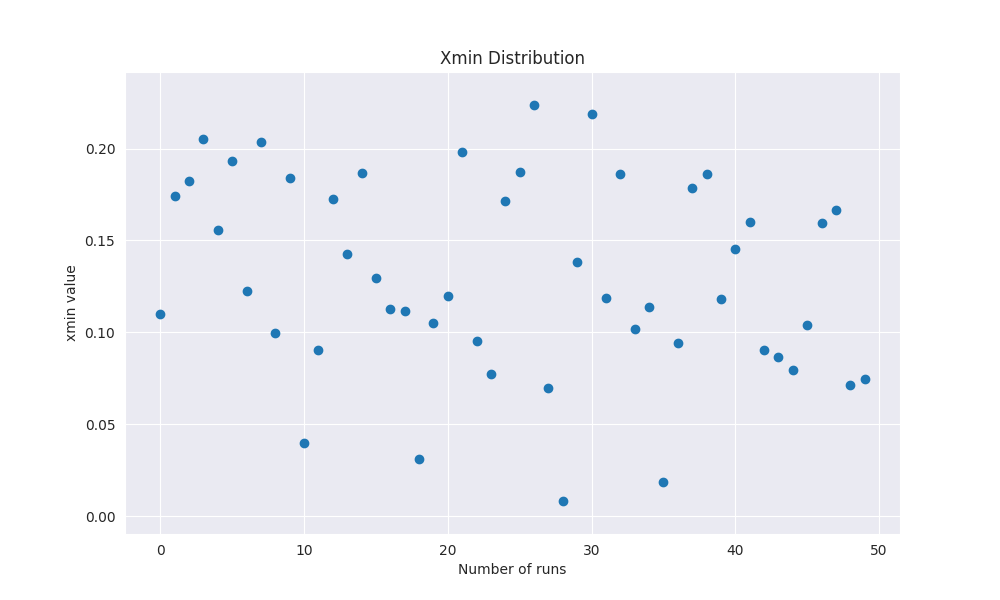

In [81]:
plt.figure(5, figsize=(10, 6))
plt.scatter(np.arange(0, len(xmins)), xmins, label='Xmins')
plt.xlabel('Number of runs')
plt.ylabel('xmin value')
plt.title('Xmin Distribution')
plt.show()

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


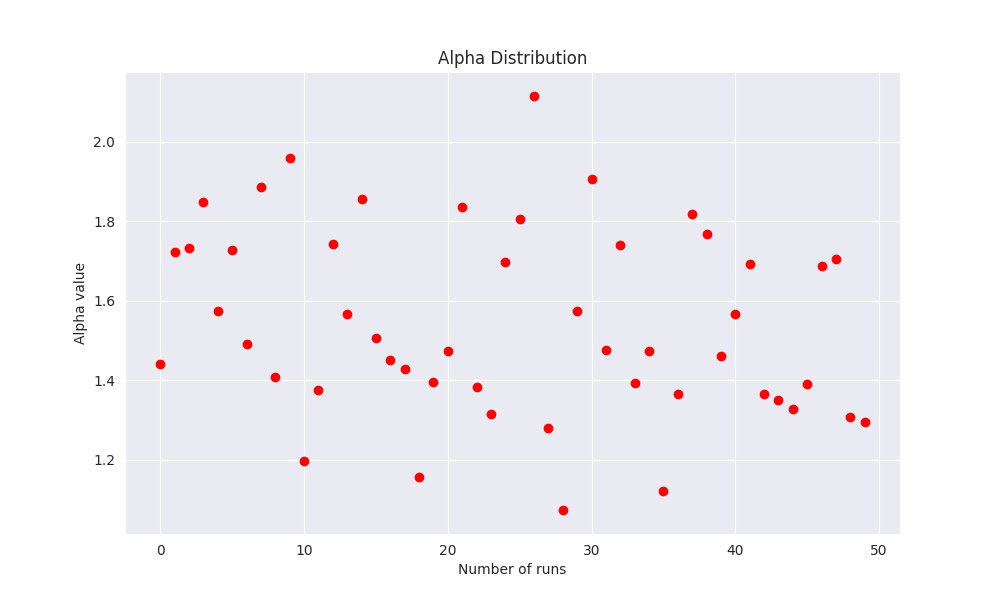

In [82]:
plt.figure(6, figsize=(10, 6))
plt.scatter(np.arange(0, len(alphas)), alphas, label='Alpha Distribution', color='r')
plt.xlabel('Number of runs')
plt.ylabel('Alpha value')
plt.title('Alpha Distribution')
plt.show()

In [87]:
def plot_deg_dist(deg_list, xmin_list, alpha_list):
    
    for i in range(len(deg_list)):
        
        degree_hat = np.exp(xmin_list[i]) * deg_list[i].alist**(-alpha_list[i])
        plt.figure(i+7, figsize=(10, 6))
        plt.scatter(deg_list[i]['alist'], deg_list[i]['Deg_list'], color='b', label='Prob')
        plt.plot(deg_list[i]['alist'], degree_hat, color='r', label='Powerlaw fit')
        plt.title('Degree_distribution')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
    

<IPython.core.display.Javascript object>


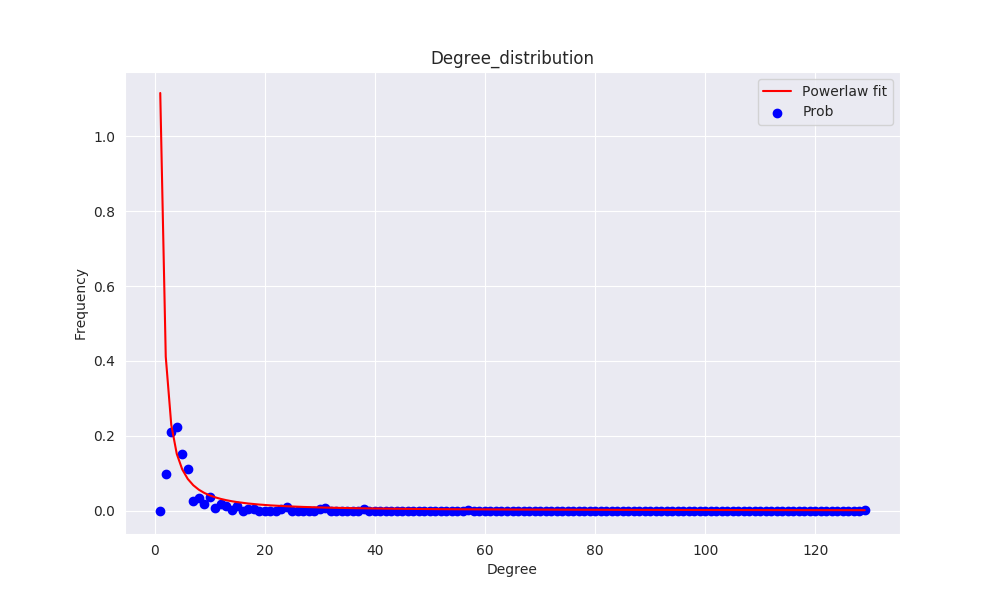

<IPython.core.display.Javascript object>


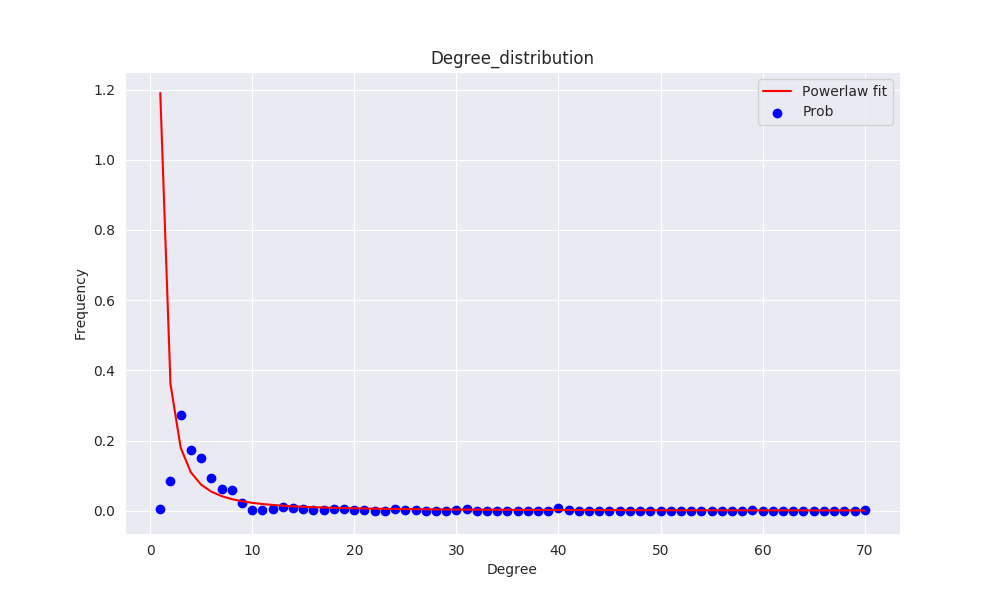

<IPython.core.display.Javascript object>


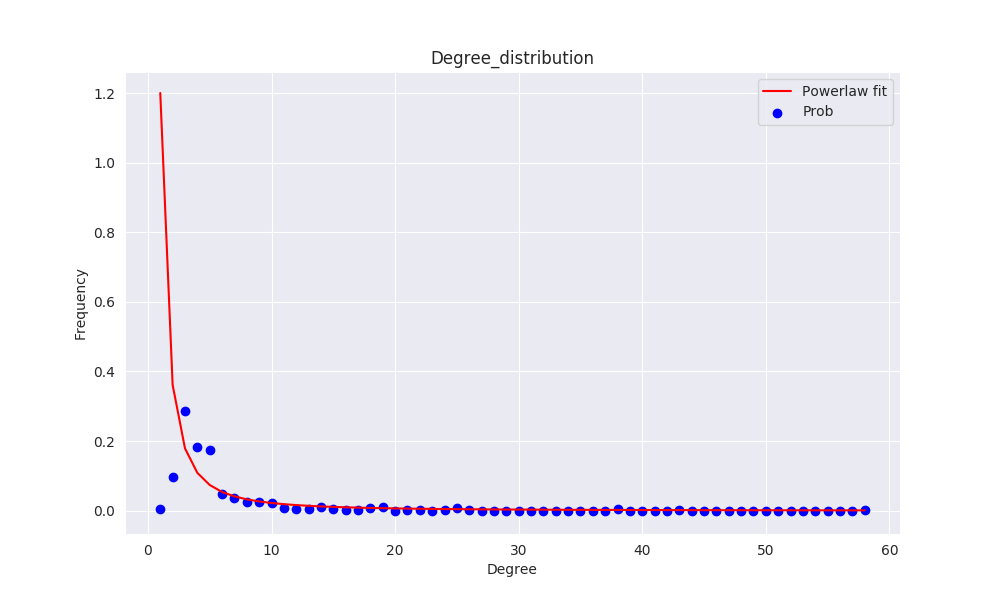

<IPython.core.display.Javascript object>


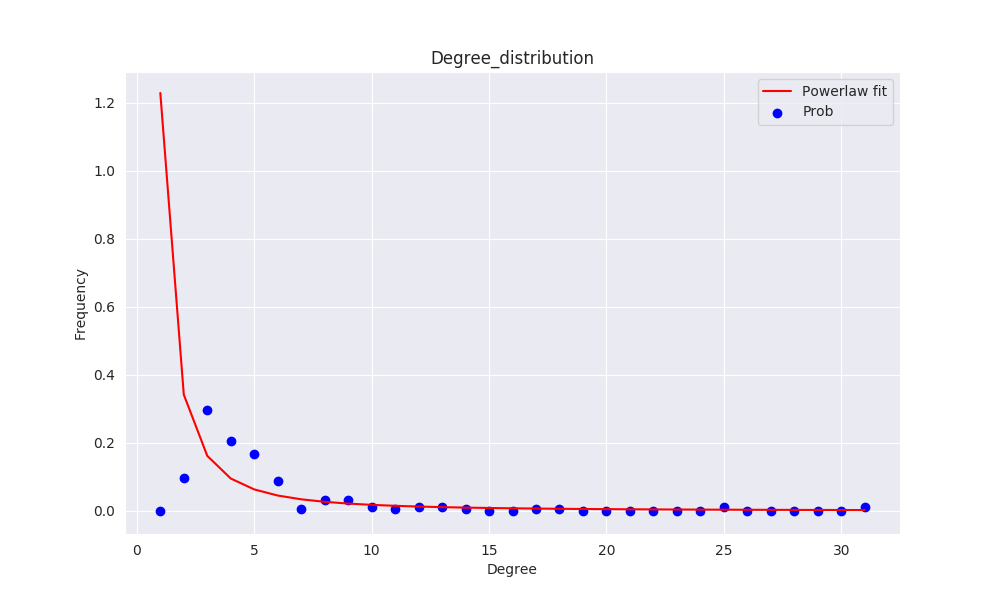

<IPython.core.display.Javascript object>


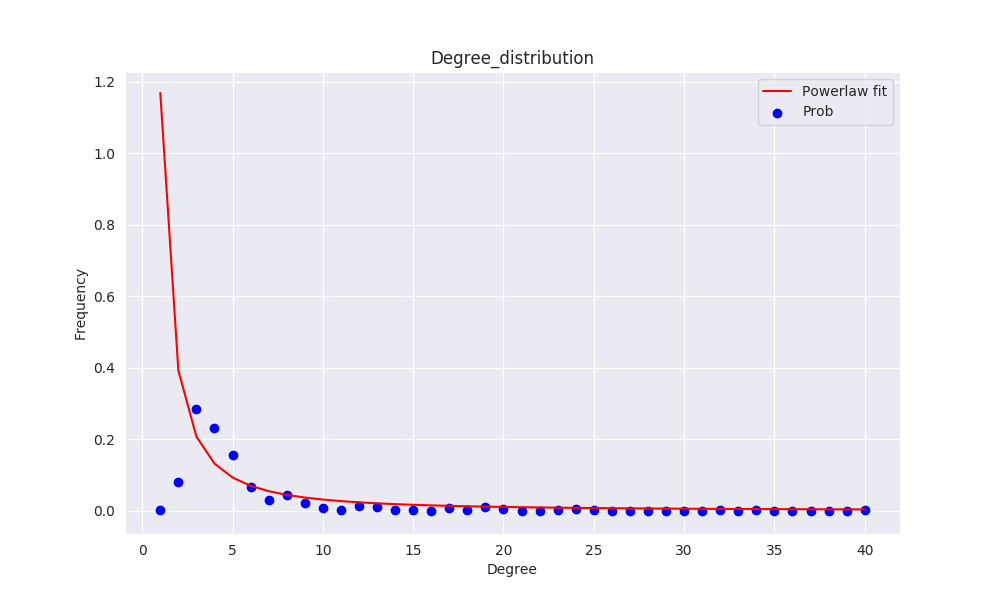

<IPython.core.display.Javascript object>


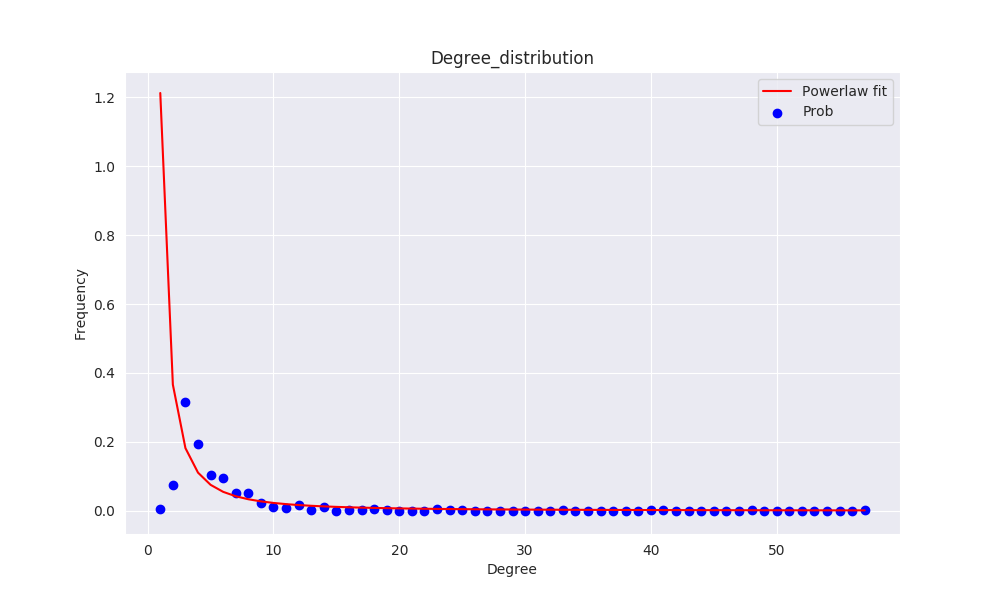

<IPython.core.display.Javascript object>


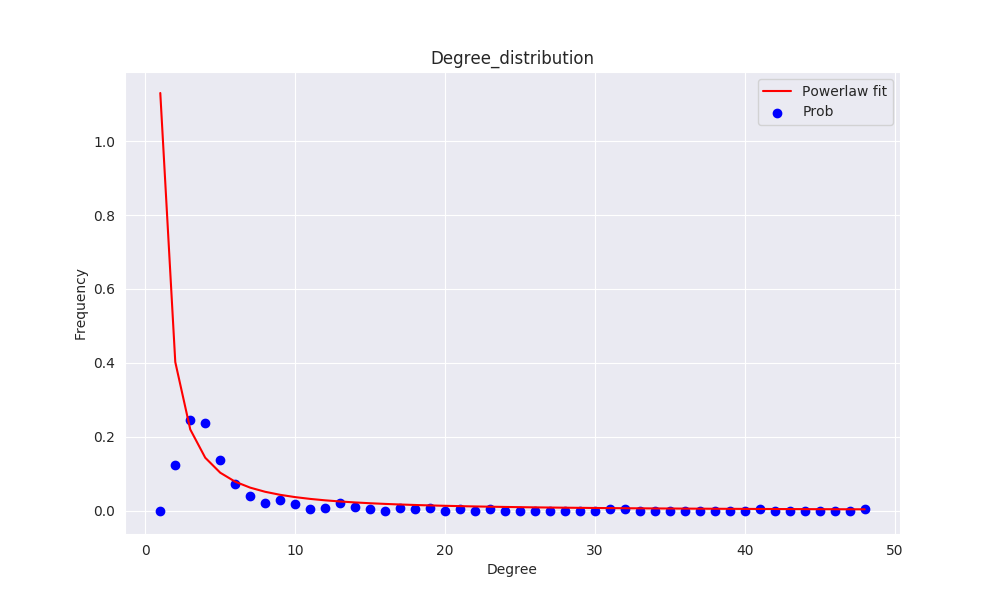

<IPython.core.display.Javascript object>


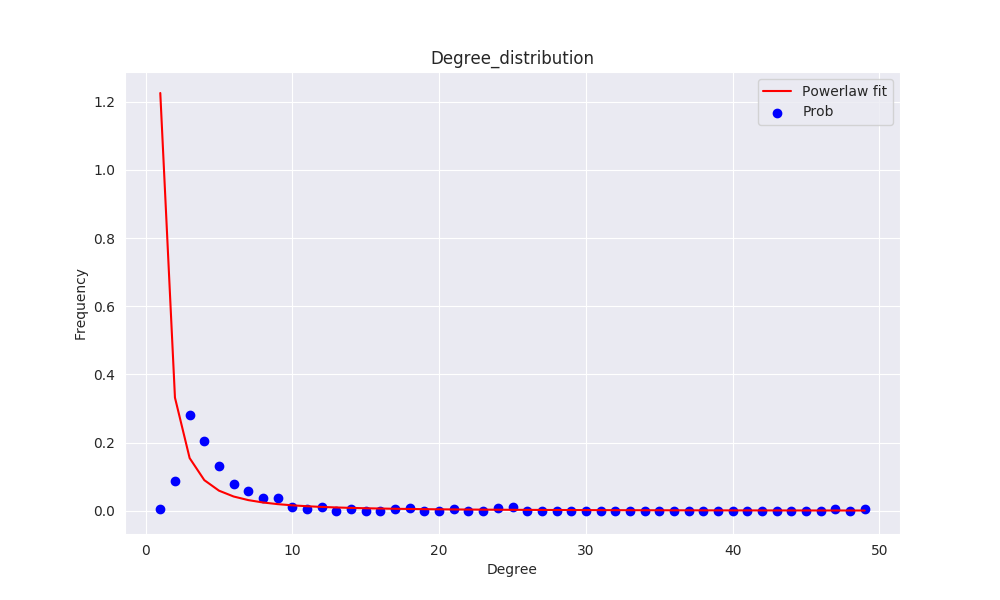

<IPython.core.display.Javascript object>


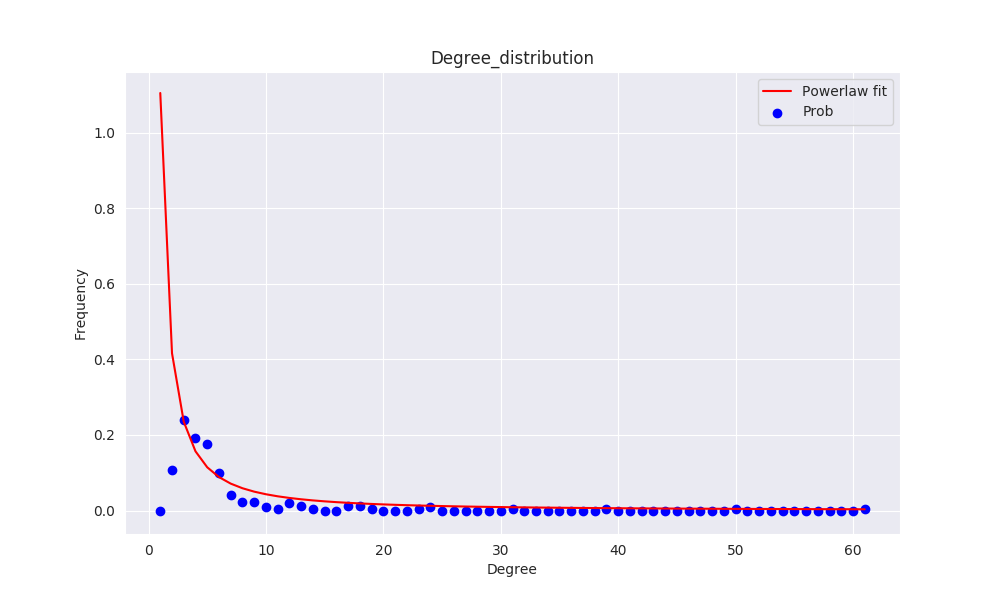

<IPython.core.display.Javascript object>


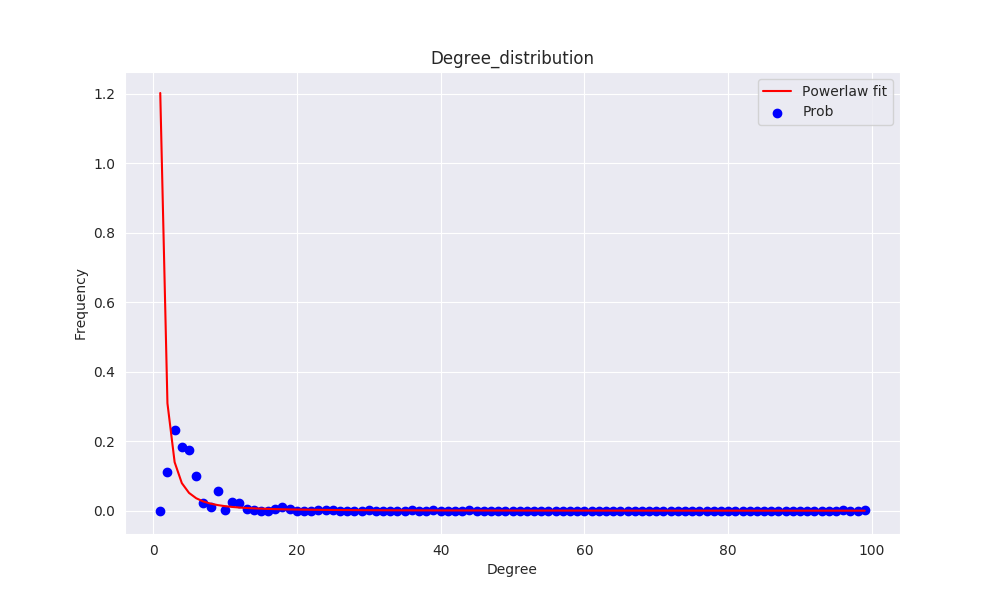

<IPython.core.display.Javascript object>


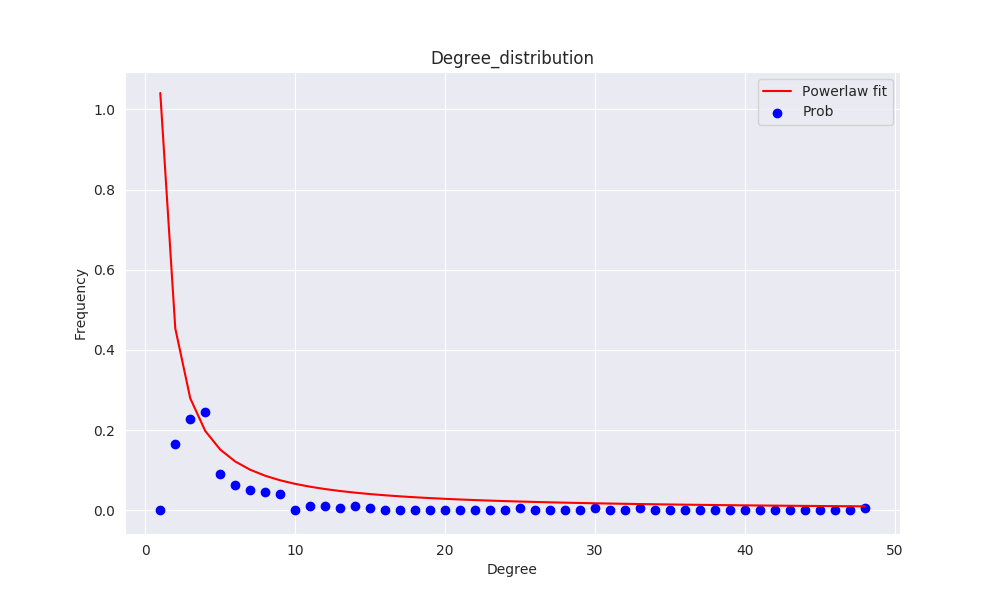

<IPython.core.display.Javascript object>


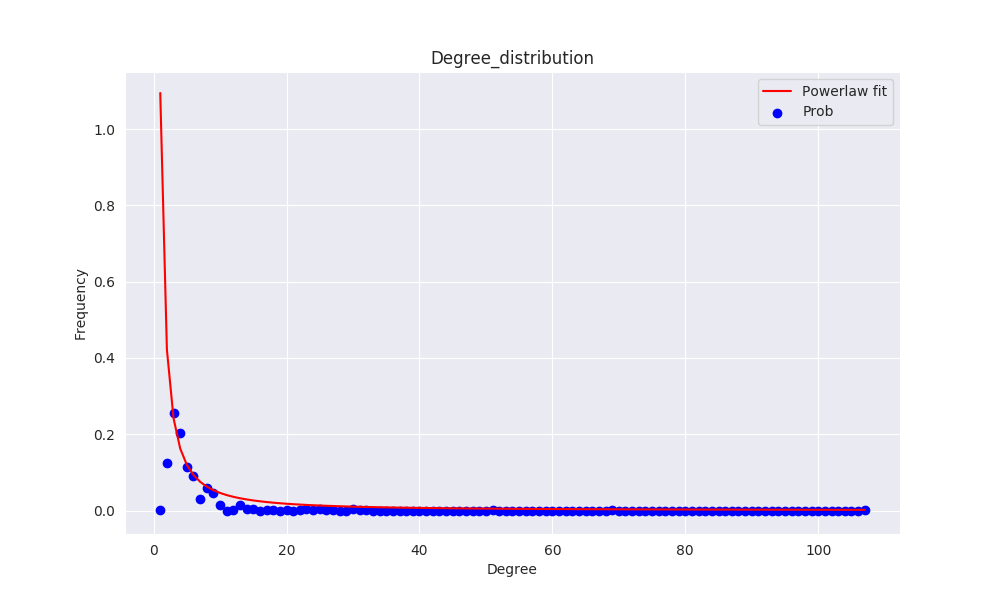

<IPython.core.display.Javascript object>


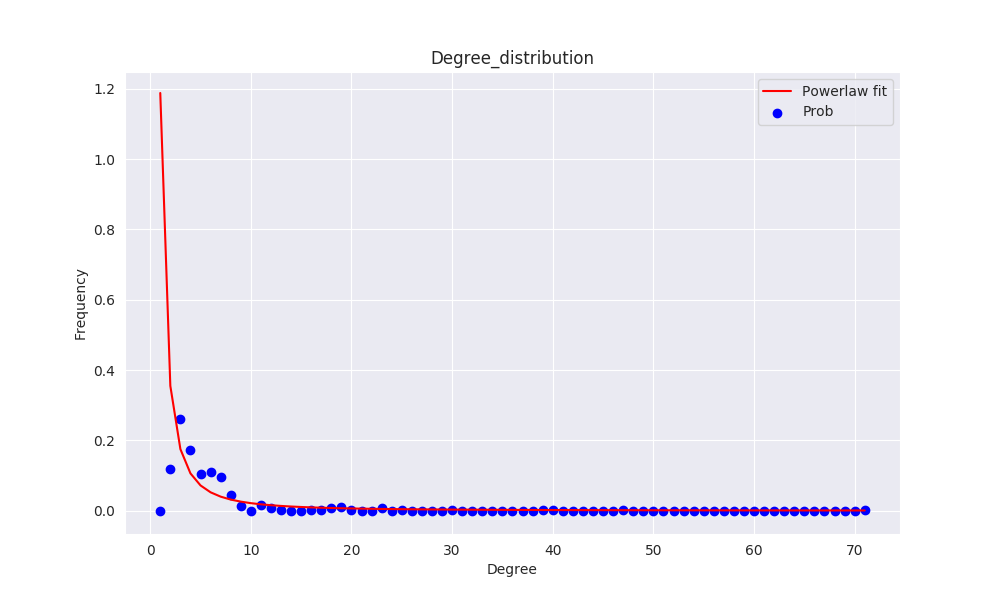

<IPython.core.display.Javascript object>


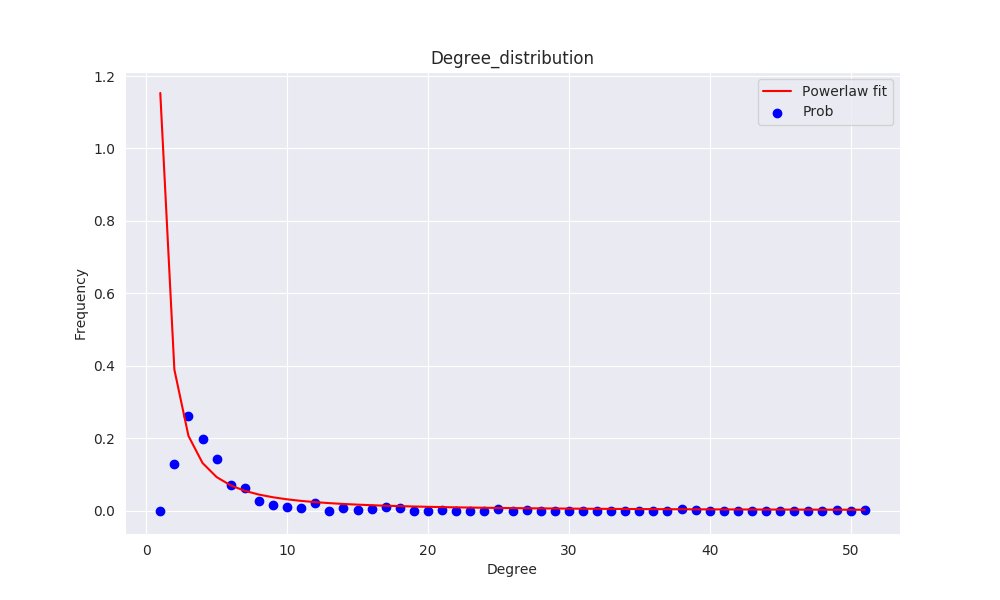

<IPython.core.display.Javascript object>


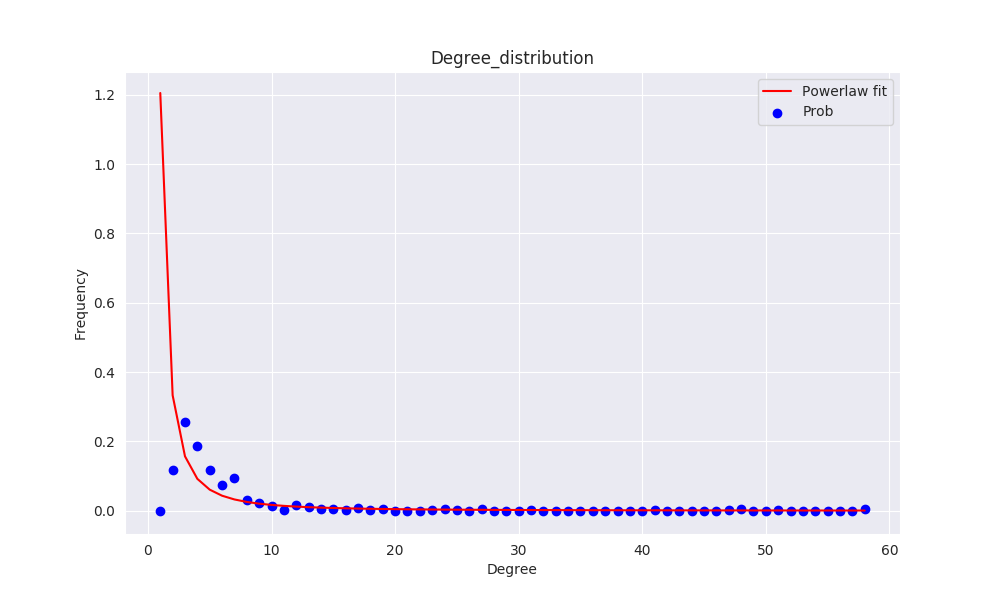

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


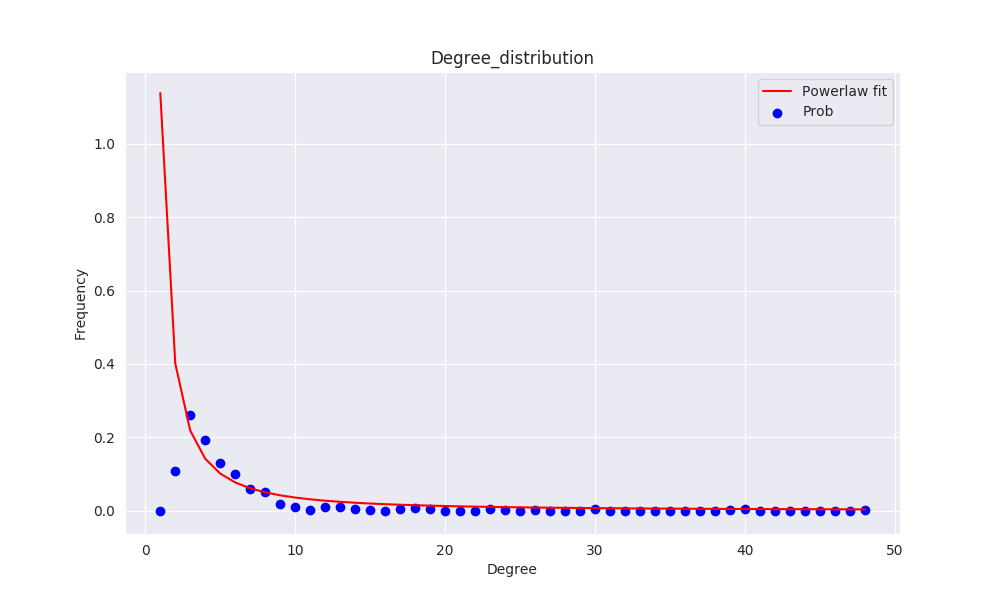

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


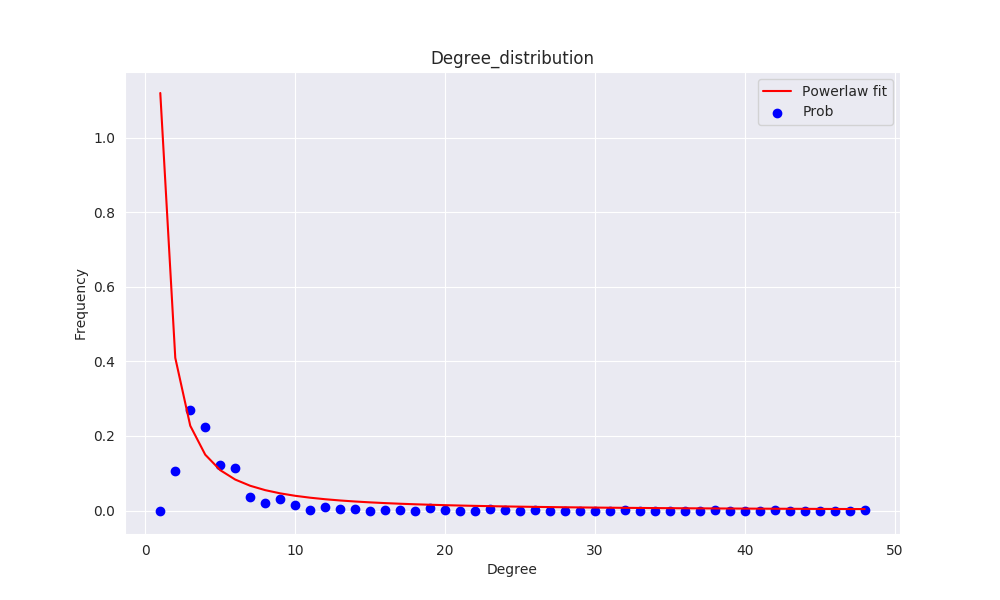

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


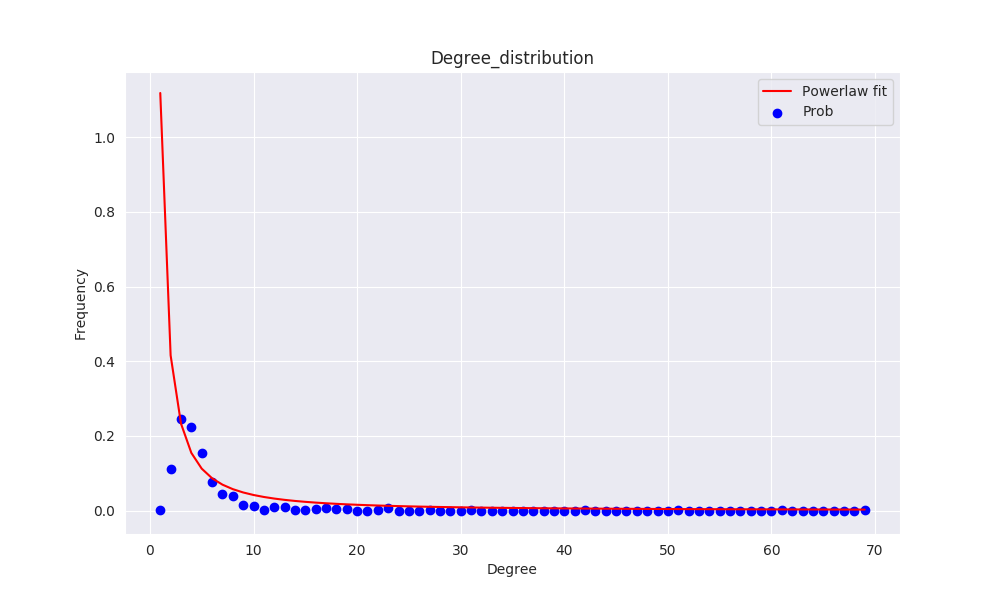

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


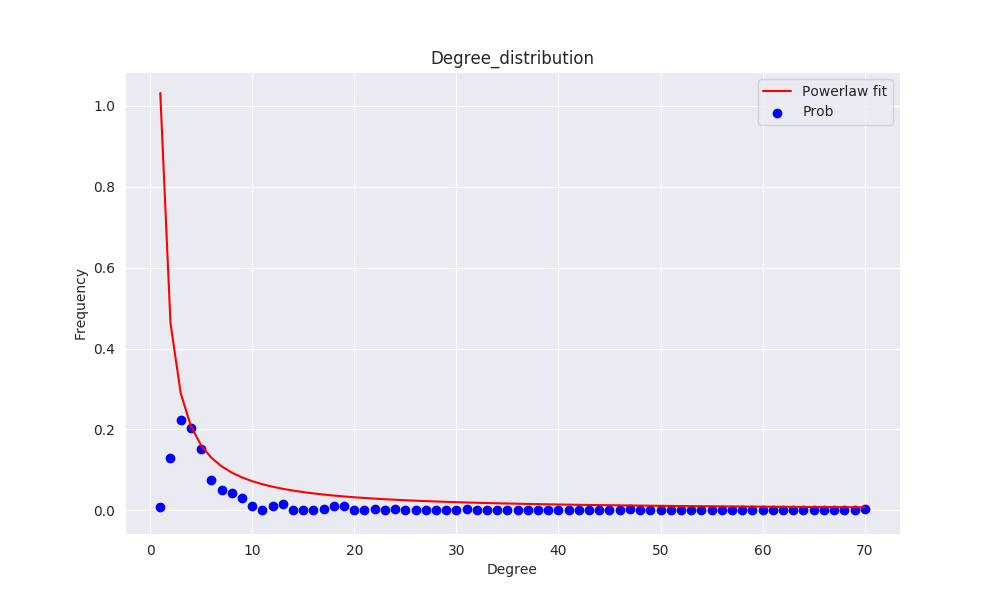

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


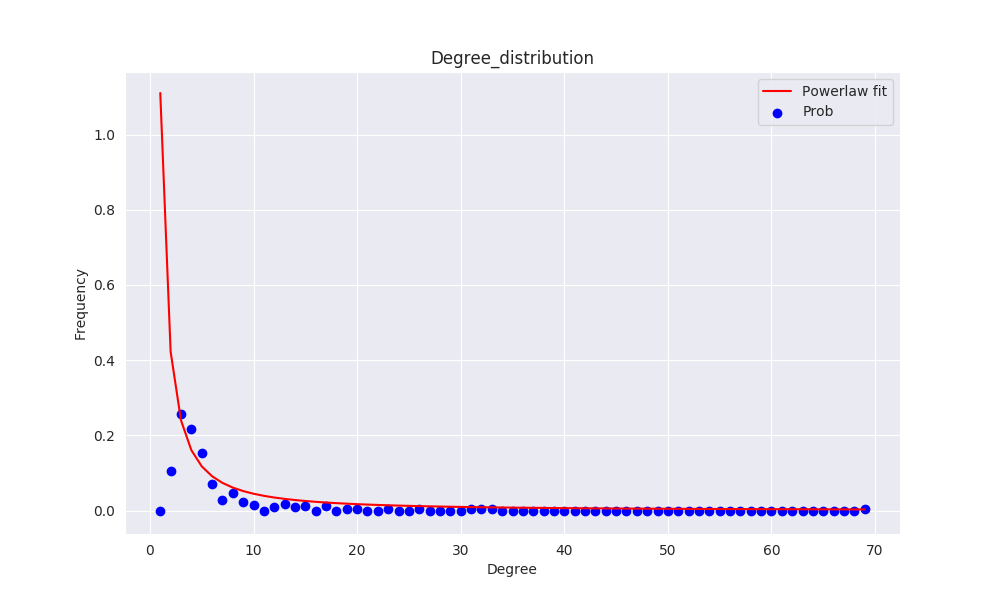

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


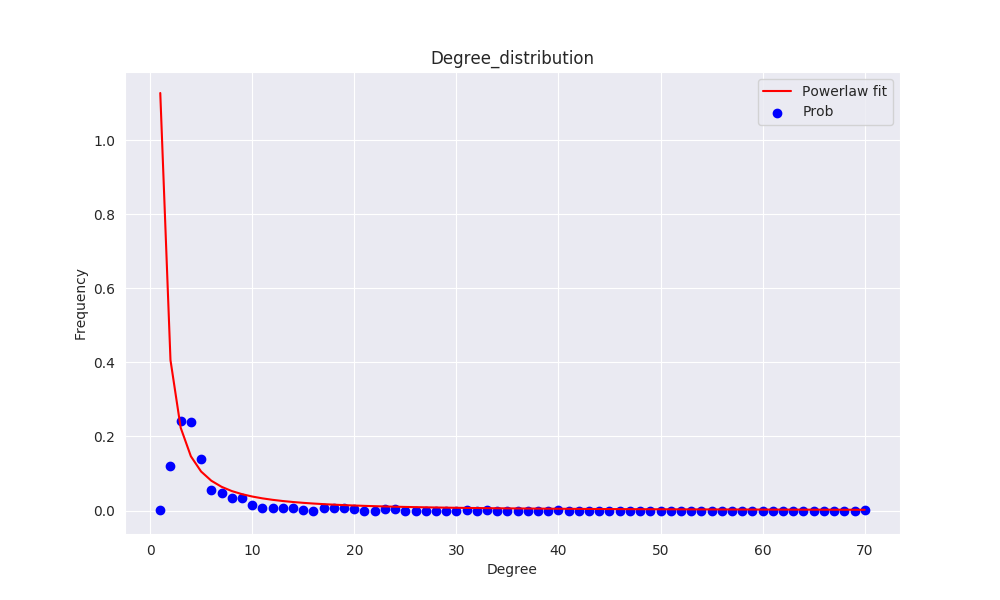

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


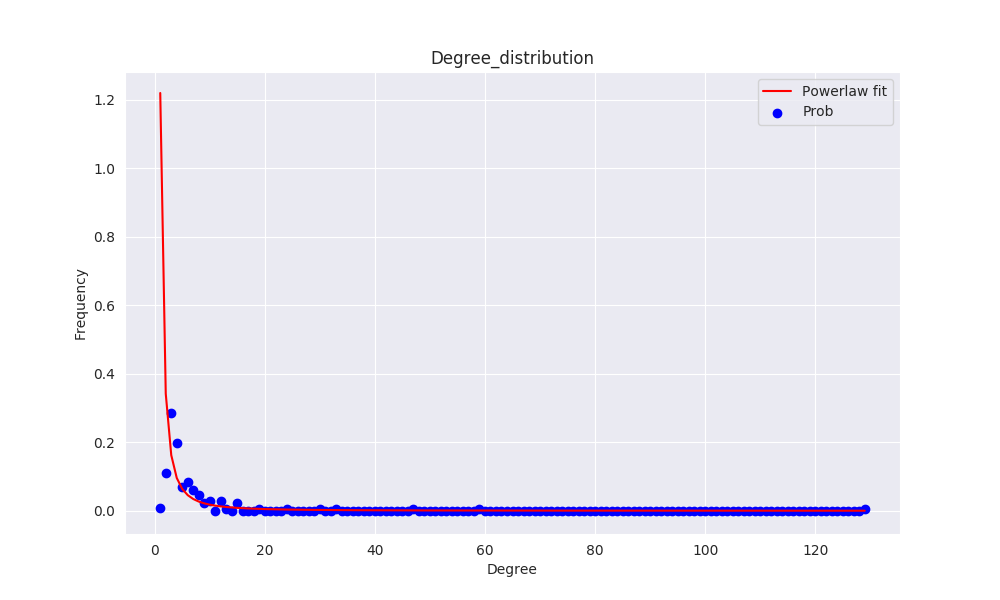

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


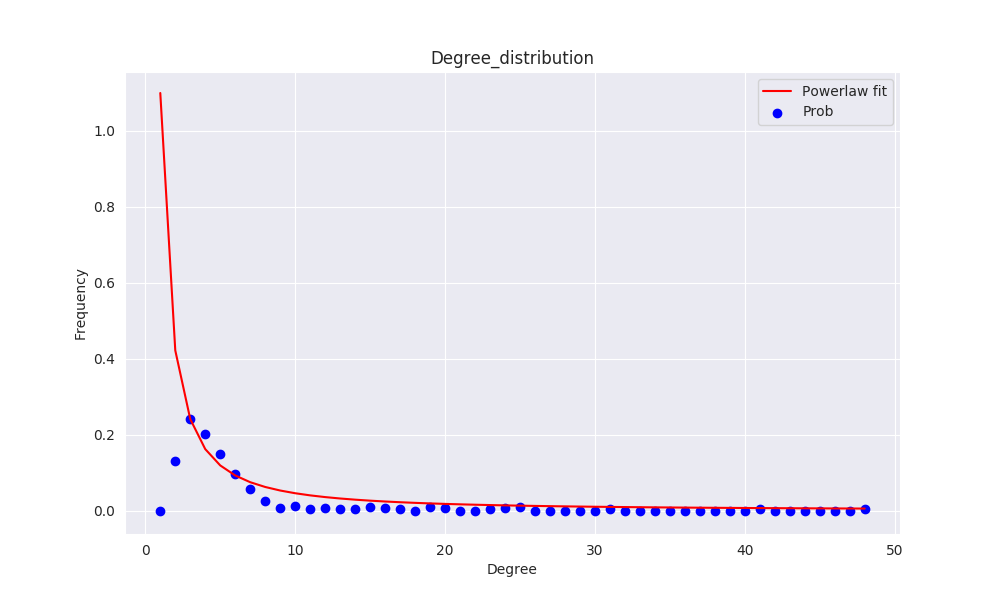

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


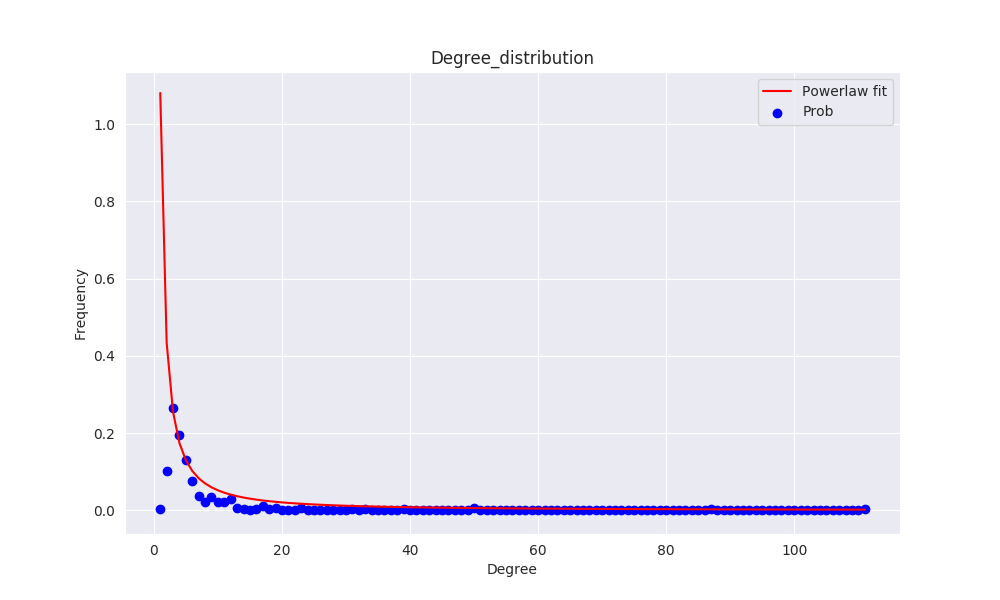

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


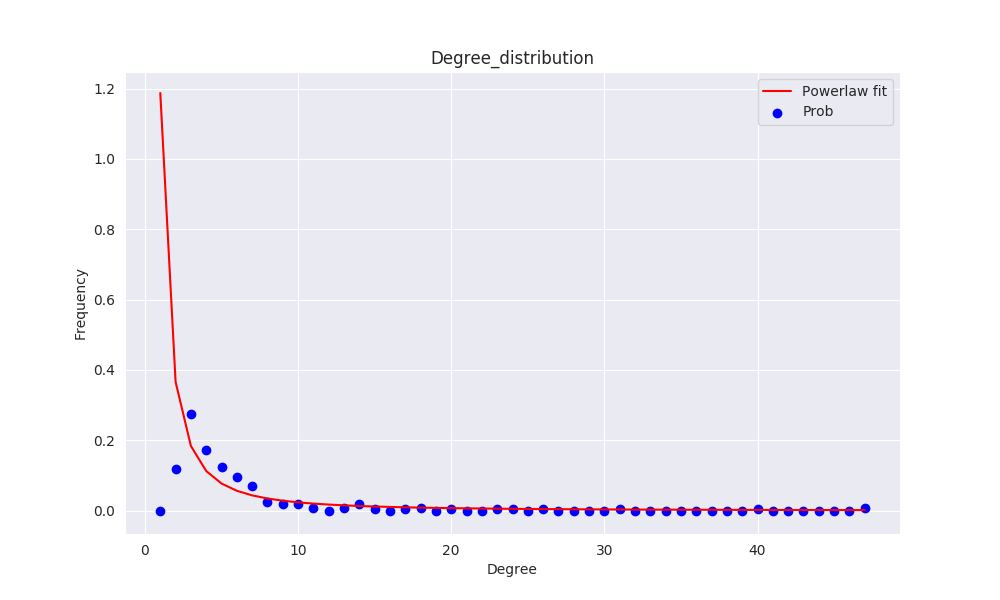

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


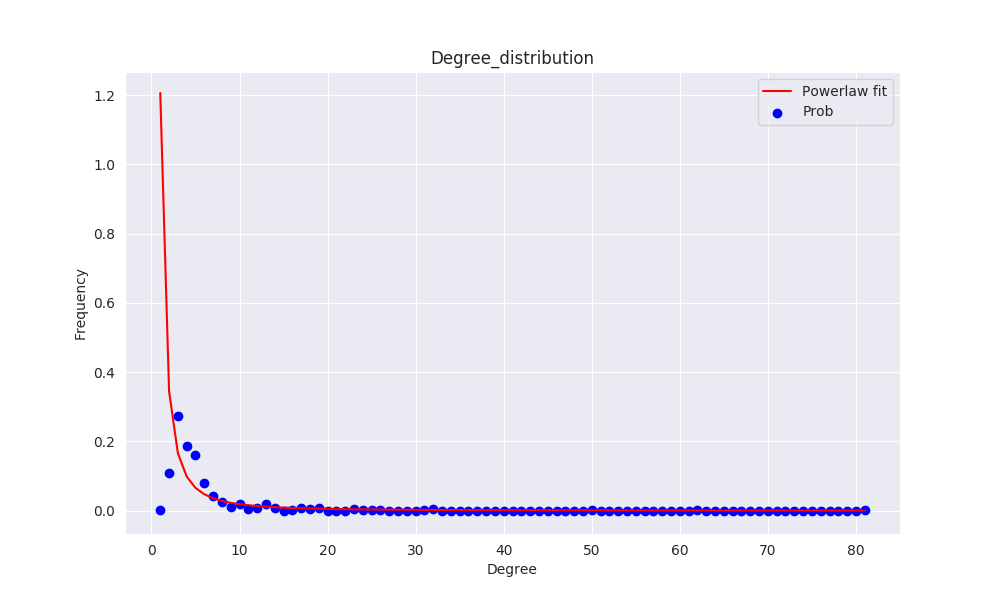

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


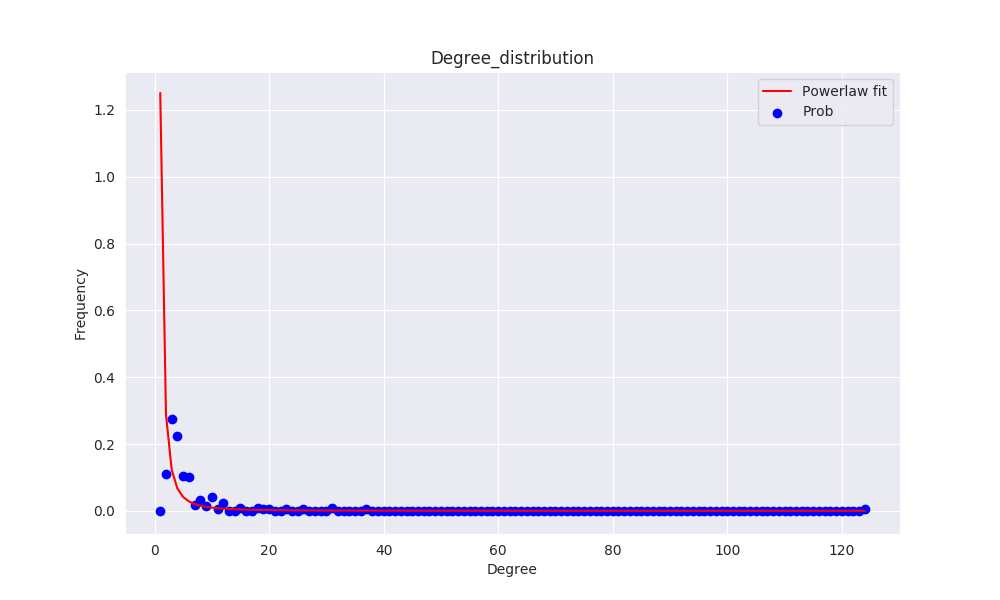

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


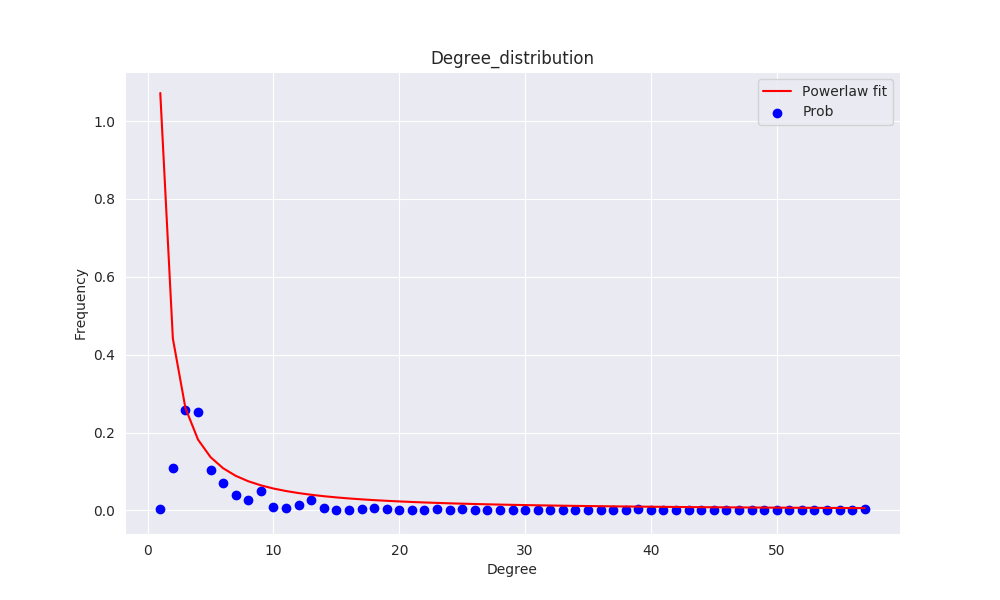

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


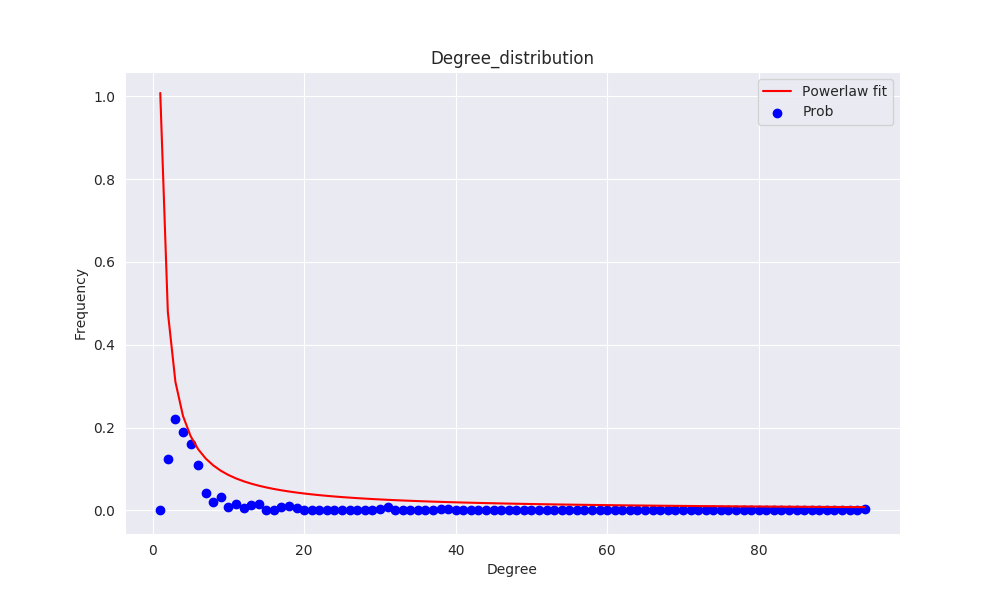

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


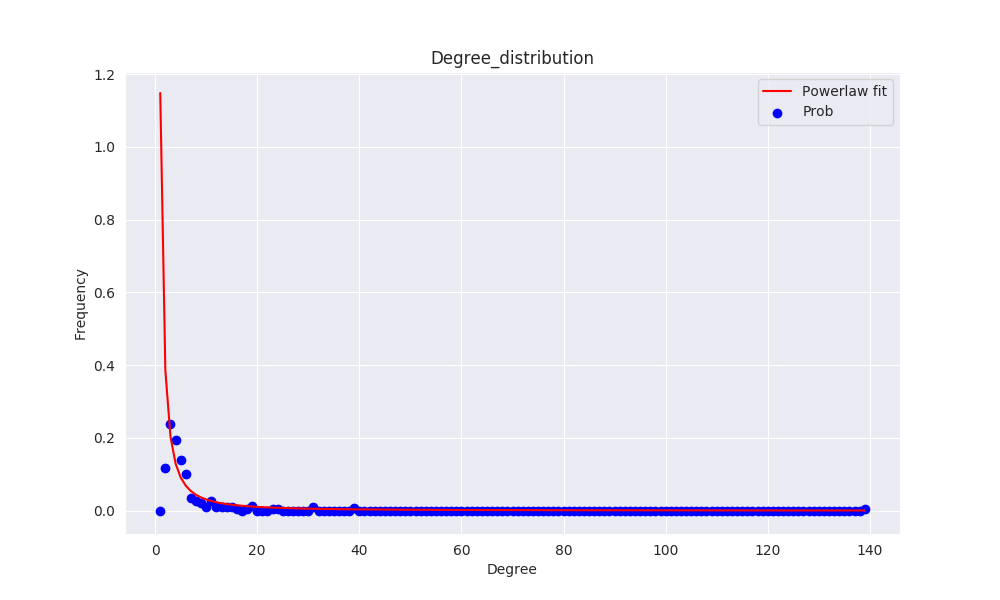

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


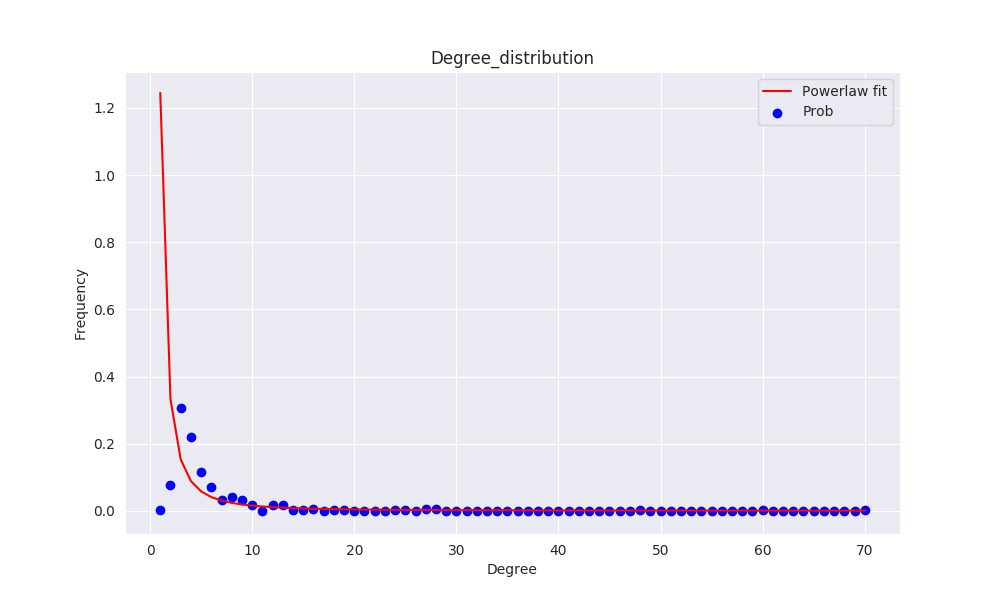

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


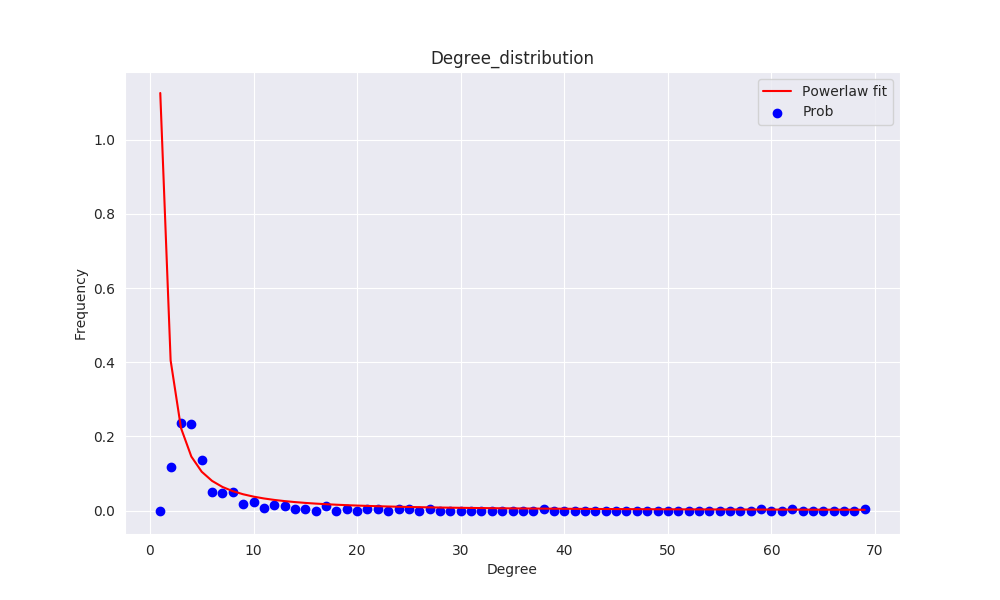

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


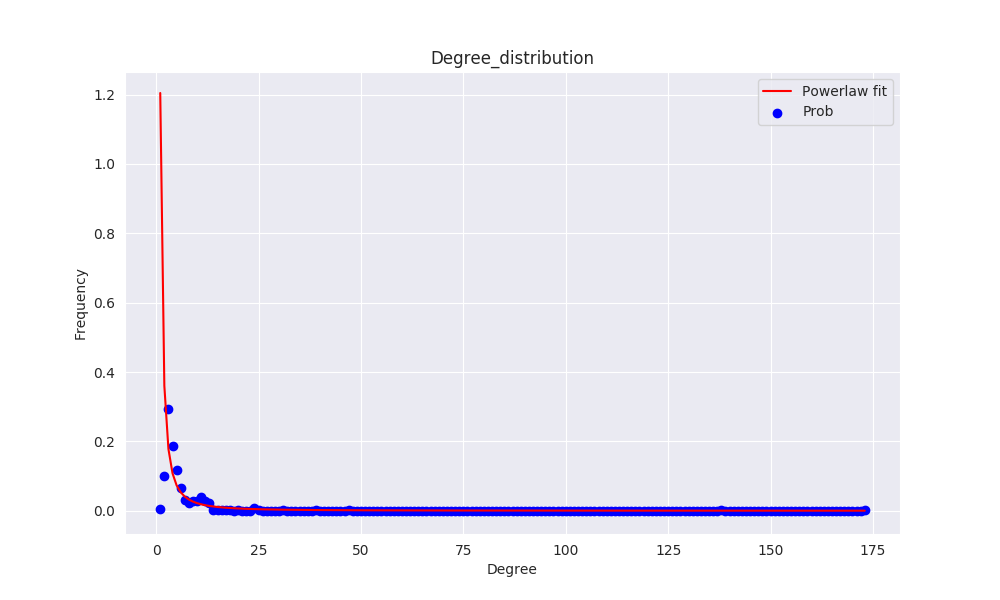

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


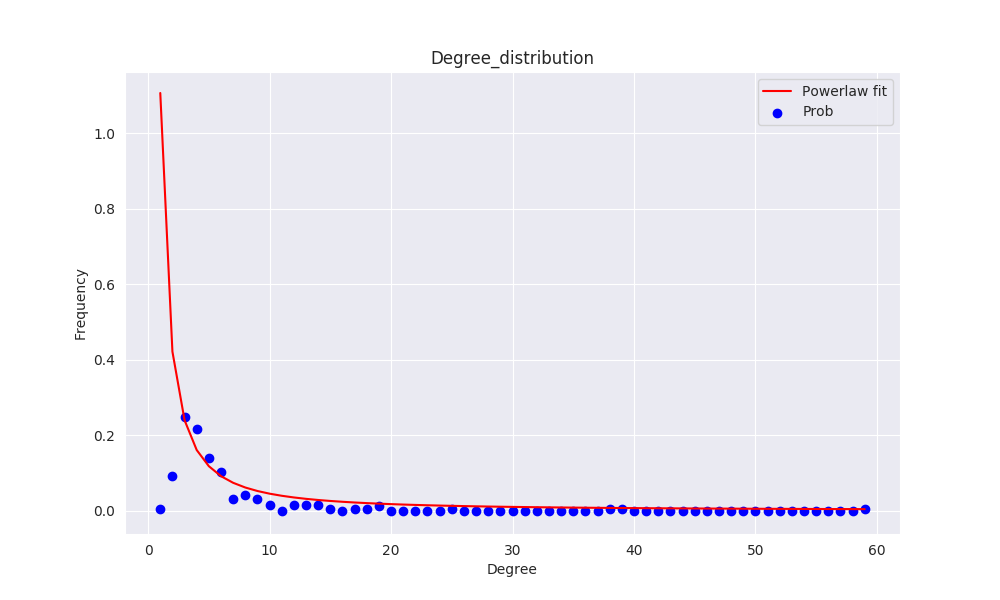

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


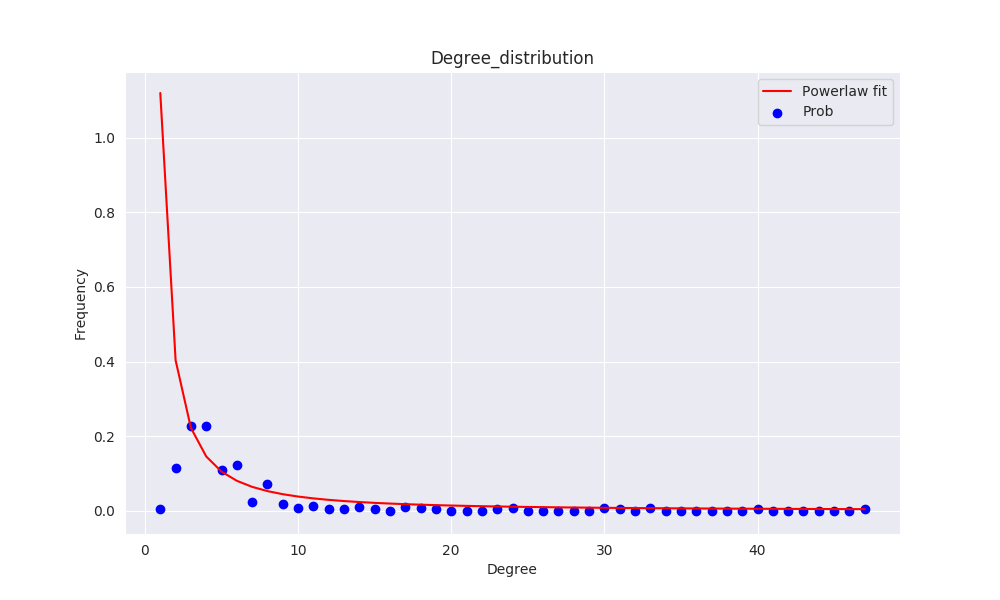

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


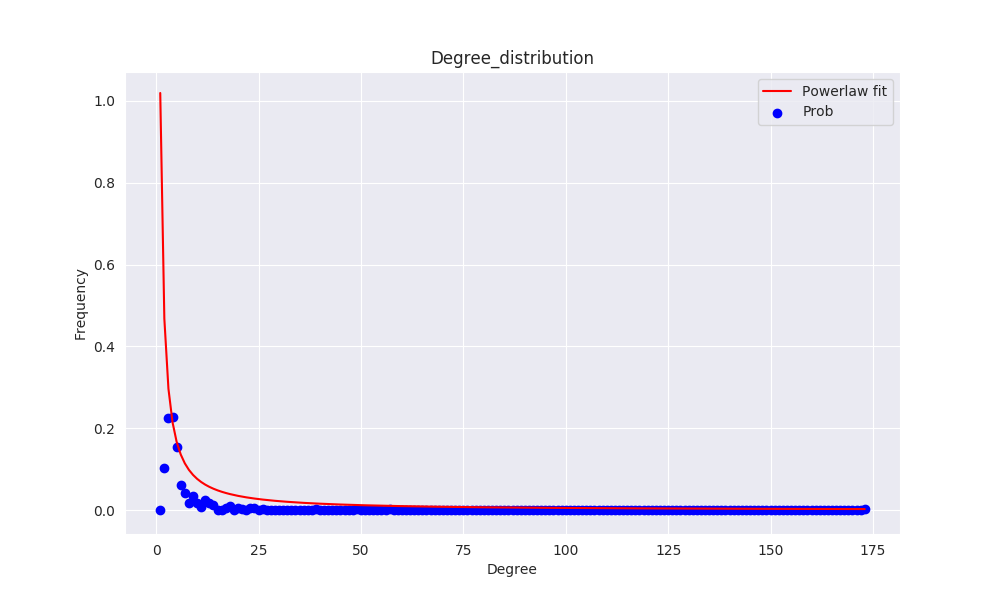

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


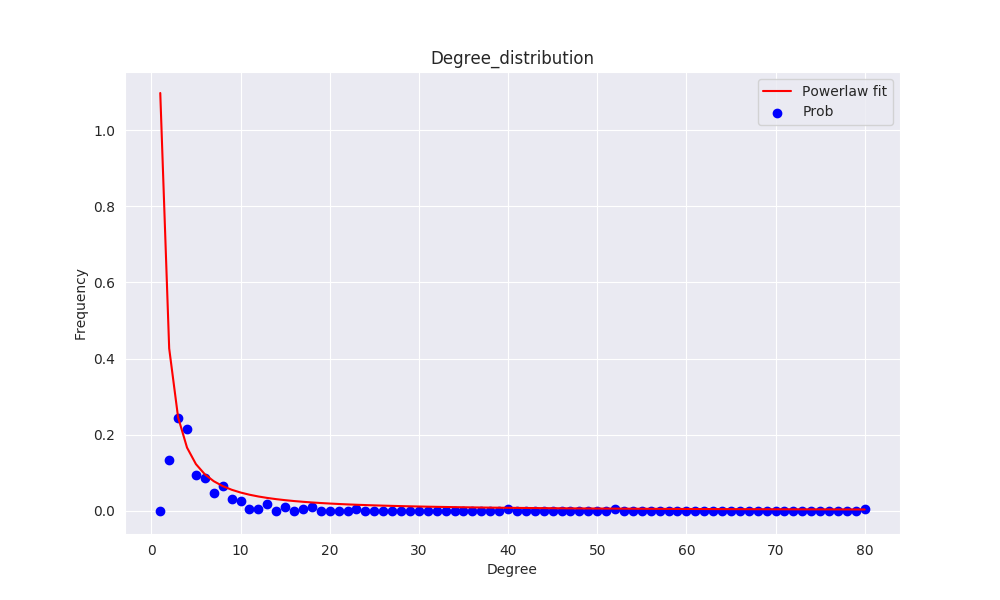

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


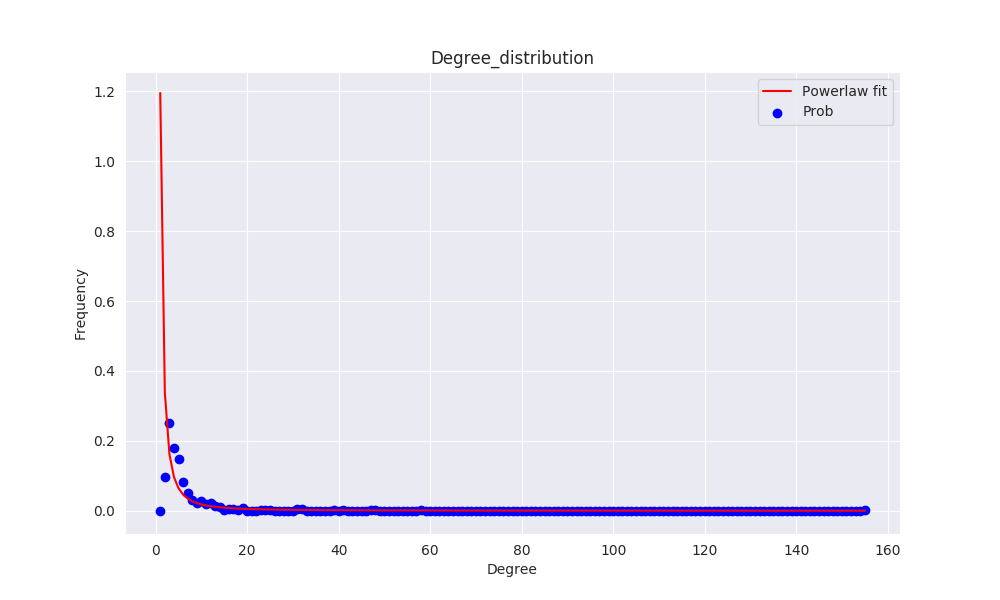

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


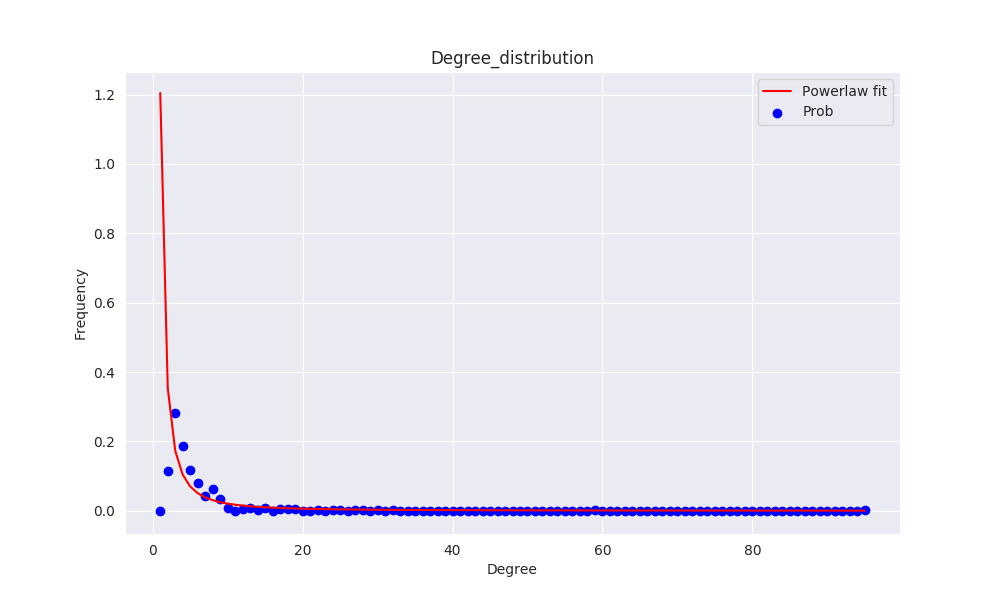

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


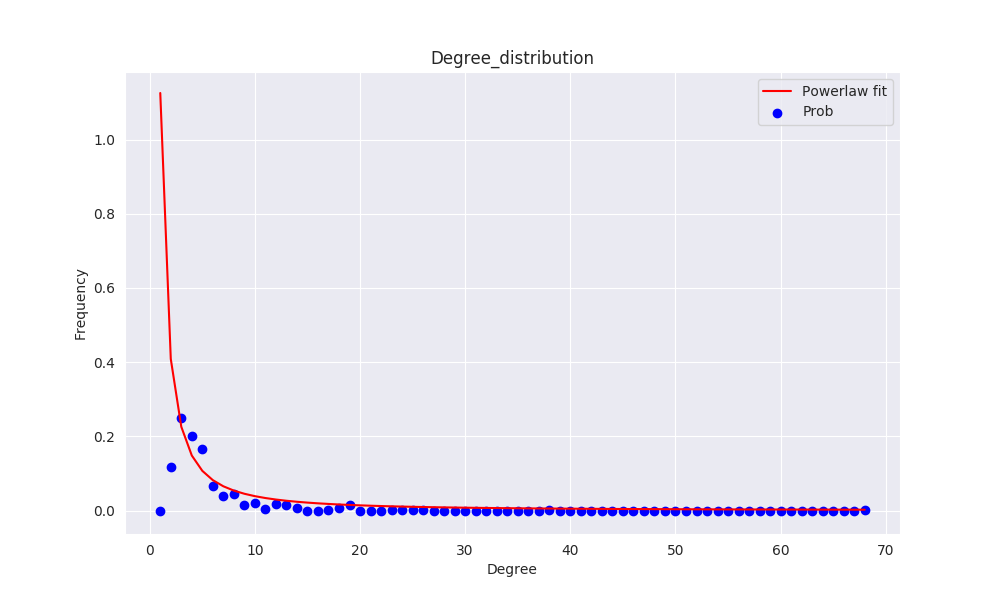

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


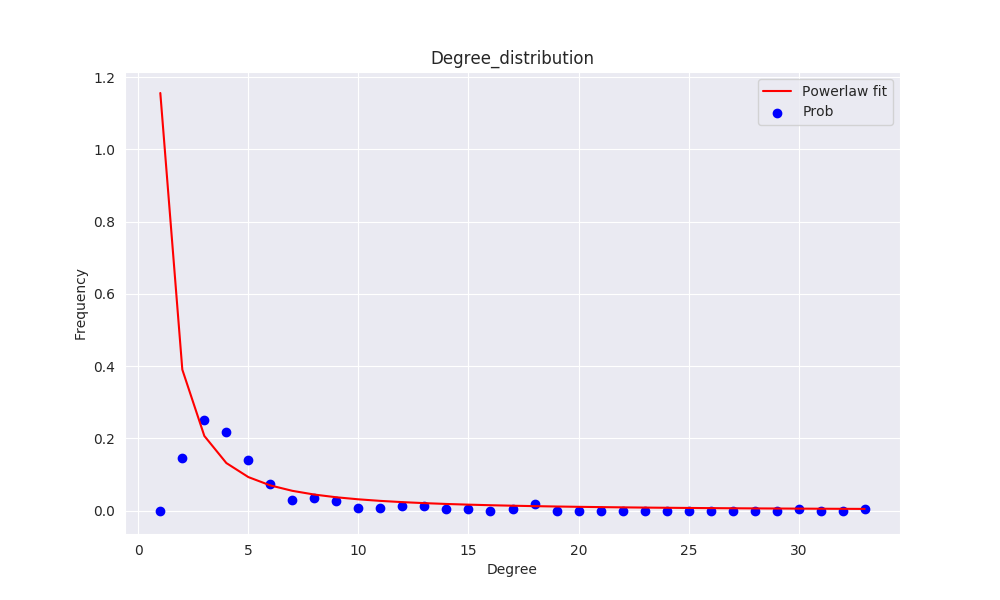

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


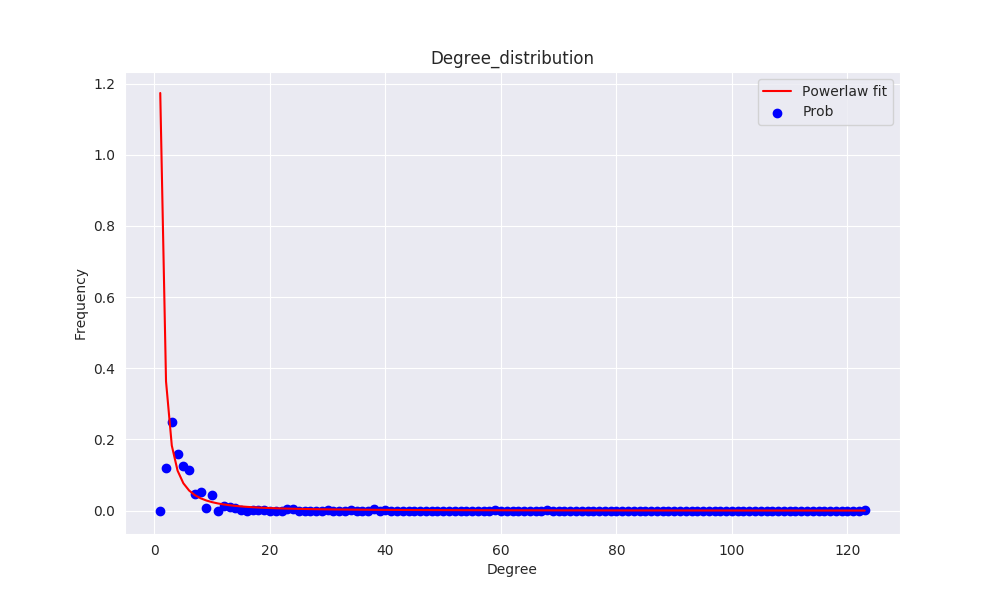

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


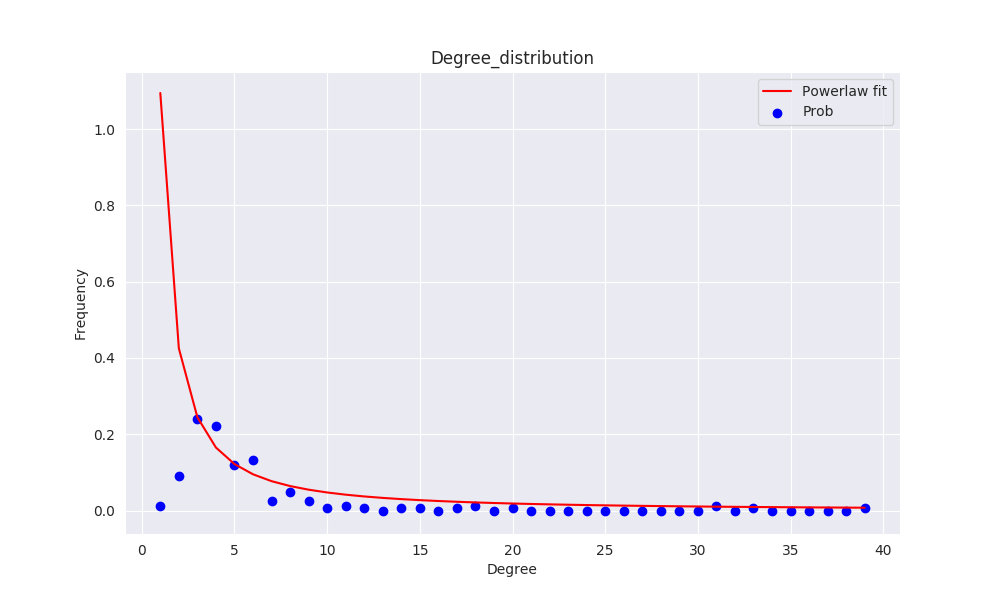

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


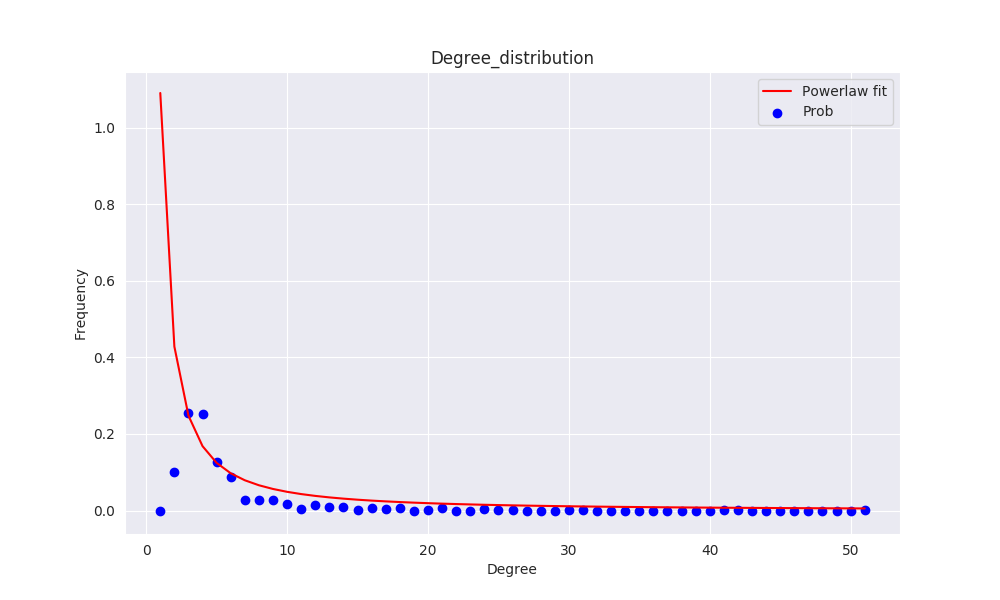

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


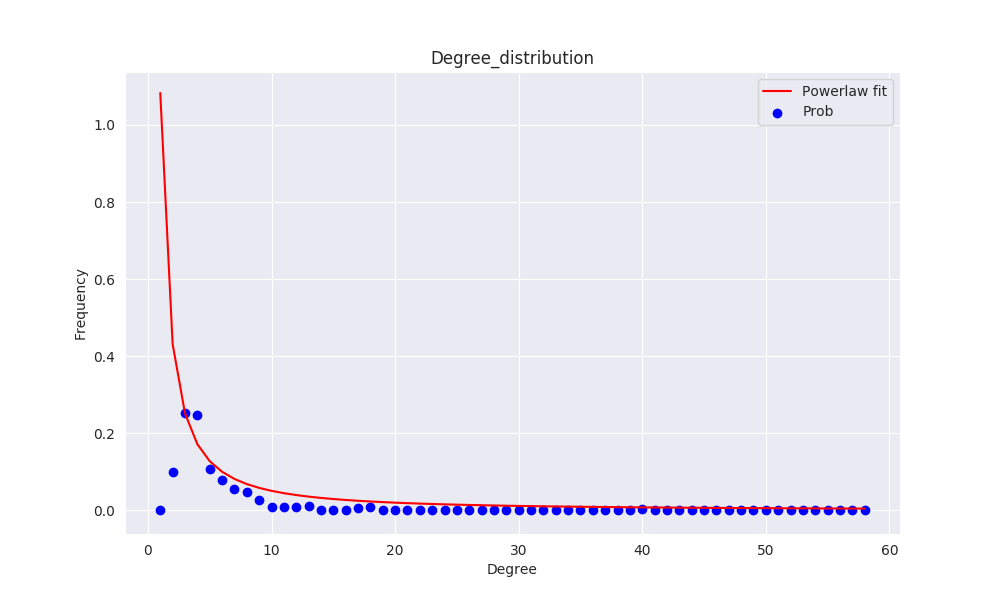

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


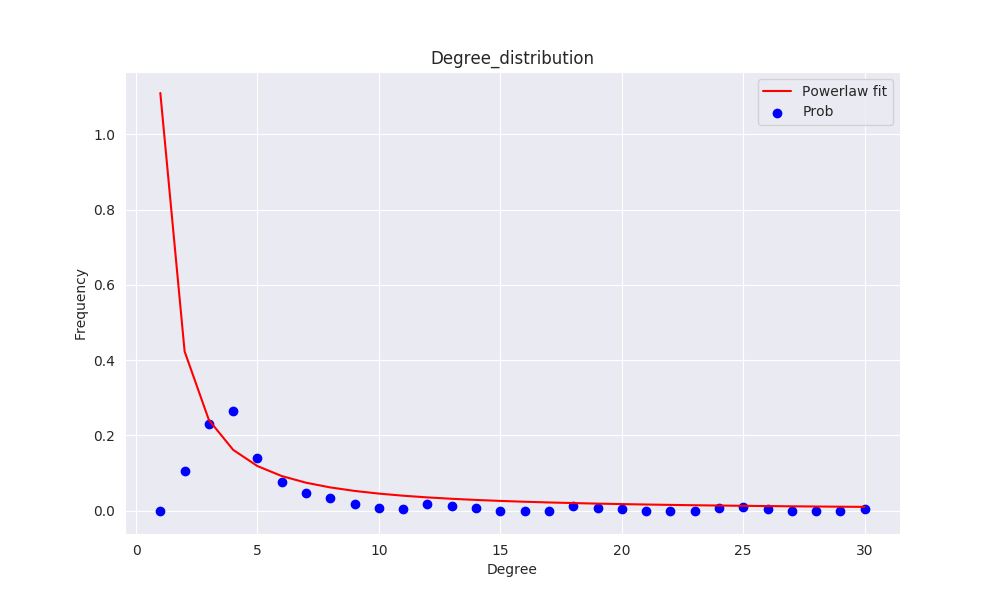

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


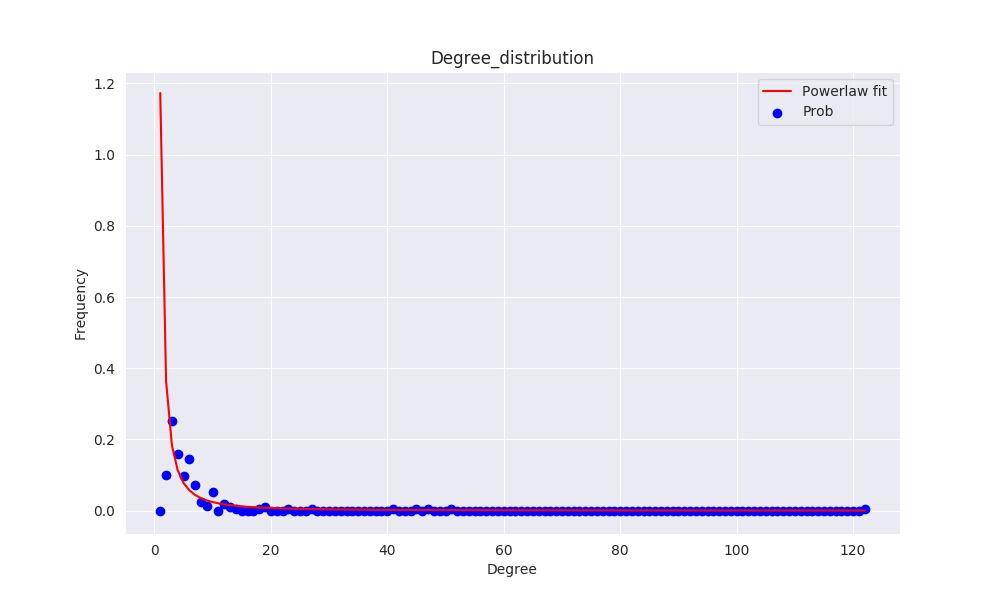

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


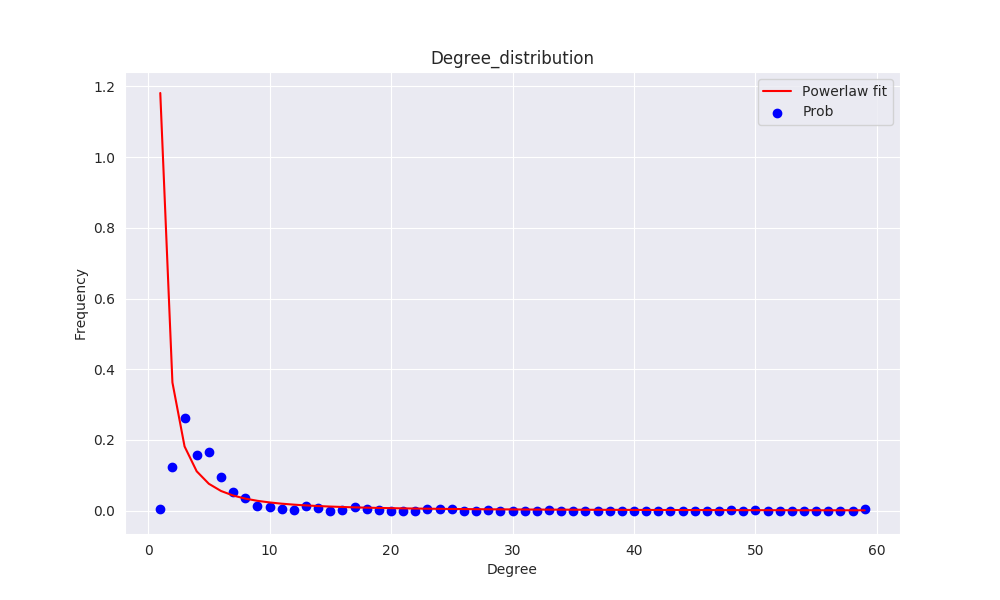

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


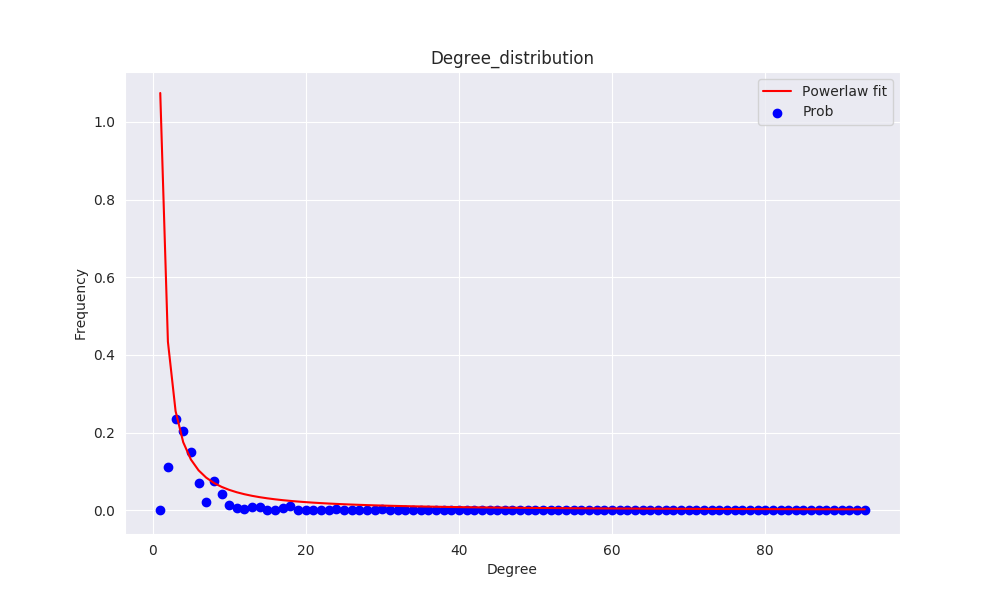

/home/acer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


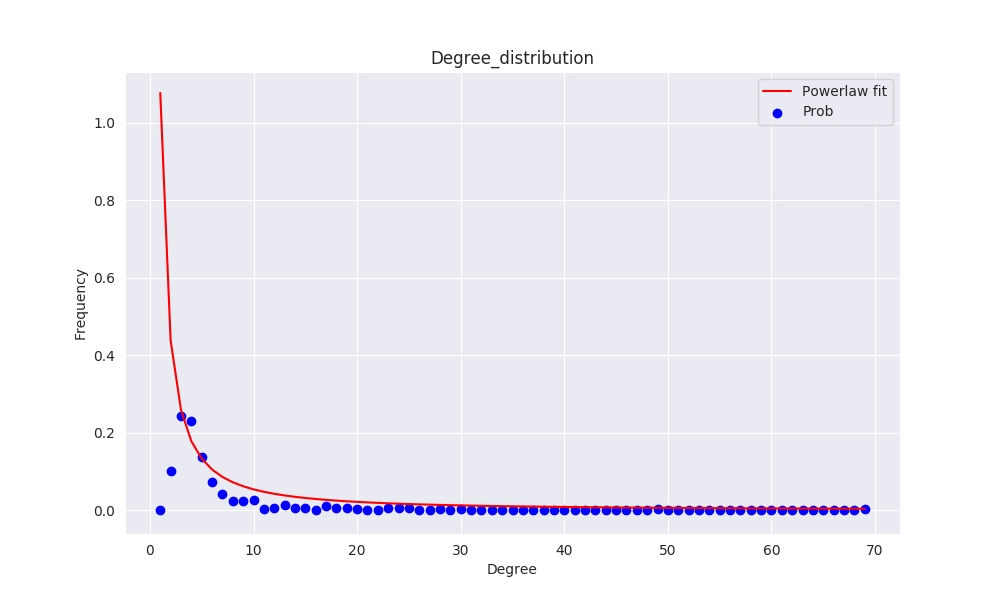

In [88]:
plot_deg_dist(list_of_dfs, xmin_list=xmins, alpha_list=alphas)

In [53]:
import collections
degree_sequence_1 = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount_1 = collections.Counter(degree_sequence_1)
deg_1, cnt_1 = zip(*degreeCount_1.items())

# degree_sequence_2 = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
# # print "Degree sequence", degree_sequence
# degreeCount_2 = collections.Counter(degree_sequence_2)
# deg_2, cnt_2 = zip(*degreeCount_2.items())

# degree_sequence_3 = sorted([d for n, d in G3.degree()], reverse=True)  # degree sequence
# # print "Degree sequence", degree_sequence
# degreeCount_3 = collections.Counter(degree_sequence_3)
# deg_3, cnt_3 = zip(*degreeCount_3.items())

# degree_sequence_4 = sorted([d for n, d in G4.degree()], reverse=True)  # degree sequence
# # print "Degree sequence", degree_sequence
# degreeCount_4 = collections.Counter(degree_sequence_4)
# deg_4, cnt_4 = zip(*degreeCount_4.items())


# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')

# plt.title("Degree Histogram")
# plt.ylabel("Count")
# plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

# # draw graph in inset
# plt.axes([0.4, 0.4, 0.5, 0.5])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(G)
# plt.axis('off')
# nx.draw_networkx_nodes(G, pos, node_size=20)
# nx.draw_networkx_edges(G, pos, alpha=0.4)

# plt.show()

<IPython.core.display.Javascript object>


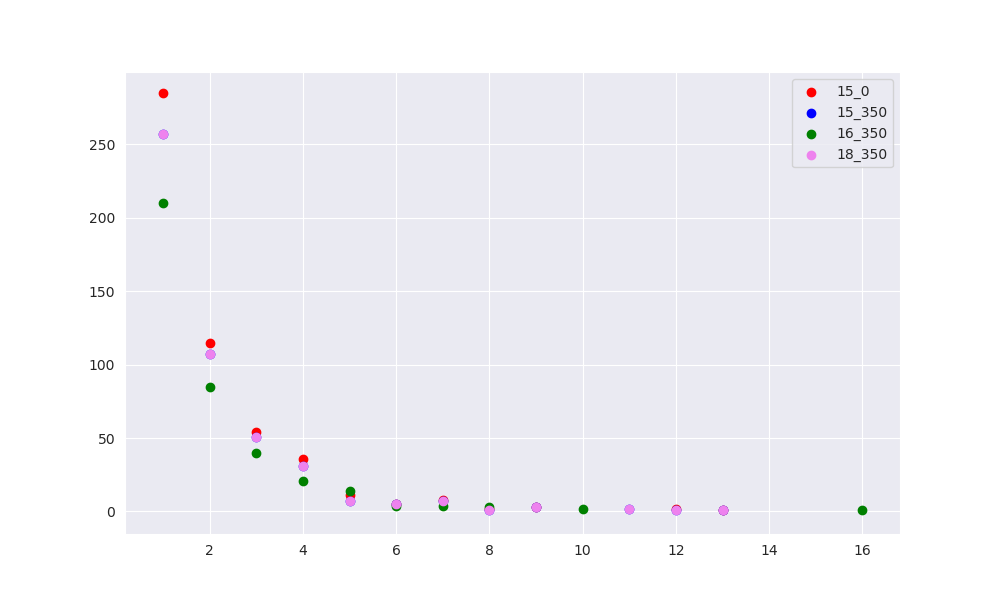

In [10]:
plt.figure(3, figsize=(10, 6))
plt.scatter(deg_1, cnt_1, color='r', label='15_0')
plt.scatter(deg_2, cnt_2, color='b', label='15_350')
plt.scatter(deg_3, cnt_3, color='g', label='16_350')
plt.scatter(deg_4, cnt_4, color='violet', label='18_350')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


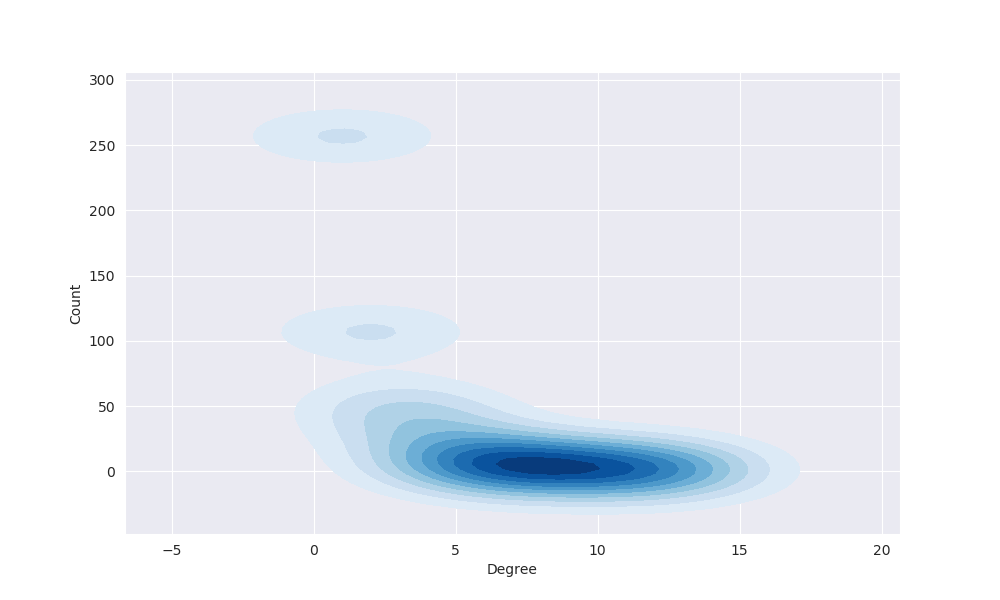

In [18]:
fig = plt.figure(4, figsize=(10,6))
ax = sns.kdeplot(np.asarray(deg_4), np.asarray(cnt_4), color='r', shade=True, Label='15_0', cmap="Reds", shade_lowest=False) 
ax = sns.kdeplot(np.asarray(deg_2), np.asarray(cnt_2), color='b', shade=True, Label='15_350', cmap="Blues", shade_lowest=False)
# ax = sns.kdeplot(np.asarray(deg_3), np.asarray(cnt_3), color='g', shade=True, Label='16_350', cmap='BrBG', shade_lowest=False)
# ax = sns.kdeplot(np.asarray(deg_4), np.asarray(cnt_4), color='violet', shade=True, Label='18_350', cmap='BrBG', shade_lowest=False)

plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [12]:
'''For the rest, I will have to make a scatter plot for the degree distribution 
Then,, I will make a seaborn plot to show the density. Everything should be added on one plot in orde'''
'''500 and 200 18, 14, 15: check the network, and get the degree distribution'''

'500 and 200 18, 14, 15: check the network, and get the degree distribution'

In [2]:
import numpy as np
import pandas as pd

In [3]:
edges = pd.read_csv('Edges.csv')

In [5]:
edges.sample(5)

Unnamed: 0   V1   V2
286          287   51   51
778          779  140  140
1938        1939  244  217
191          192   25   25
1550        1551   59   59

In [10]:
edges.drop(columns='Unnamed: 0')

V1   V2
0       1    2
1       2    2
2       2    2
3       2    2
4       2    2
...   ...  ...
2590  522  517
2591  517  517
2592  517  511
2593  511  511
2594  518  518

[2595 rows x 2 columns]

In [13]:
a = edges['V1']
b = edges['V2']

In [20]:
c = np.zeros((edges.shape[0])*2)

In [21]:
c.shape

(5190,)

In [33]:
k = list()
for i in range(len(a)):

    k.append(a[i])
    k.append(b[i])



In [35]:
c = np.asarray(k)

In [39]:
new_Edges = pd.DataFrame(c)

In [40]:
new_Edges.to_csv(path_or_buf='new_Edges.csv')